In [79]:
# iPhone 16 Reviews Data Preprocessing
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

print("Libraries imported successfully!")

Libraries imported successfully!


[nltk_data] Downloading package punkt to /Users/sumith/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sumith/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sumith/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/sumith/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [80]:
# Load the CSV data
df = pd.read_csv('iphone16_reviews - Sheet1.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
df.head()

Dataset loaded successfully!
Dataset shape: (360, 3)

First few rows:


,Serial Number,Reviews,Labels
0,1,"The iPhone 16's camera system is exceptional, ...",1.0
1,2,Battery life on the iPhone 16 is significantly...,1.0
2,3,The new A-series chip in the iPhone 16 deliver...,1.0
3,4,I love the updated design of the iPhone 16; it...,1.0
4,5,The display on the iPhone 16 is absolutely gor...,1.0


In [81]:
# Data exploration and basic statistics
print("Dataset Information:")
print(f"Total records: {len(df)}")
print(f"Columns: {list(df.columns)}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())

# Check unique labels
print(f"\nUnique labels: {df['Labels'].unique()}")
print(f"Label distribution:")
print(df['Labels'].value_counts())

# Check for empty reviews
empty_reviews = df['Reviews'].isnull() | (df['Reviews'] == '') | (df['Reviews'].str.strip() == '')
print(f"\nEmpty reviews: {empty_reviews.sum()}")

df.info()

Dataset Information:
Total records: 360
Columns: ['Serial Number', 'Reviews', 'Labels']

Data types:
Serial Number      int64
Reviews           object
Labels           float64
dtype: object

Missing values:
Serial Number      0
Reviews          120
Labels           120
dtype: int64

Unique labels: [1.  0.  0.5 nan]
Label distribution:
Labels
1.0    81
0.0    81
0.5    78
Name: count, dtype: int64

Empty reviews: 120
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Serial Number  360 non-null    int64  
 1   Reviews        240 non-null    object 
 2   Labels         240 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.6+ KB


In [82]:
# Data cleaning and preprocessing
# Remove rows with empty or null reviews
df_clean = df.dropna(subset=['Reviews'])
df_clean = df_clean[df_clean['Reviews'].str.strip() != '']
df_clean = df_clean[df_clean['Reviews'].notna()]

print(f"Records after removing empty reviews: {len(df_clean)}")
print(f"Removed {len(df) - len(df_clean)} empty records")

# Reset index
df_clean = df_clean.reset_index(drop=True)

# Display sample of cleaned data
print("\nSample of cleaned data:")
df_clean[['Reviews', 'Labels']].head(10)

Records after removing empty reviews: 240
Removed 120 empty records

Sample of cleaned data:


,Reviews,Labels
0,"The iPhone 16's camera system is exceptional, ...",1.0
1,Battery life on the iPhone 16 is significantly...,1.0
2,The new A-series chip in the iPhone 16 deliver...,1.0
3,I love the updated design of the iPhone 16; it...,1.0
4,The display on the iPhone 16 is absolutely gor...,1.0
5,iOS 19 on the iPhone 16 offers fantastic new f...,1.0
6,Call quality and cellular reception on the iPh...,1.0
7,The iPhone 16's haptic feedback is precise and...,1.0
8,"Storage options on the iPhone 16 are generous,...",1.0
9,The Face ID on the iPhone 16 is faster and mor...,1.0


In [83]:
# Text preprocessing functions
def clean_text(text):
    """Clean and preprocess text data"""
    if pd.isna(text):
        return ""
    
    # Convert to string and lowercase
    text = str(text).lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove special characters and digits (keep only alphabets and spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def remove_stopwords(text):
    """Remove stopwords from text"""
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

def stem_text(text):
    """Apply stemming to text"""
    stemmer = PorterStemmer()
    word_tokens = word_tokenize(text)
    stemmed_text = [stemmer.stem(word) for word in word_tokens]
    return ' '.join(stemmed_text)

def lemmatize_text(text):
    """Apply lemmatization to text"""
    lemmatizer = WordNetLemmatizer()
    word_tokens = word_tokenize(text)
    lemmatized_text = [lemmatizer.lemmatize(word) for word in word_tokens]
    return ' '.join(lemmatized_text)

print("Text preprocessing functions defined!")

Text preprocessing functions defined!


In [84]:
# Apply text preprocessing
print("Applying text preprocessing...")

# Create a copy for preprocessing
df_processed = df_clean.copy()

# Apply basic text cleaning
df_processed['cleaned_reviews'] = df_processed['Reviews'].apply(clean_text)

# Apply stopwords removal
df_processed['no_stopwords'] = df_processed['cleaned_reviews'].apply(remove_stopwords)

# Apply lemmatization (generally preferred over stemming)
df_processed['lemmatized_reviews'] = df_processed['no_stopwords'].apply(lemmatize_text)

# Calculate text length statistics
df_processed['review_length'] = df_processed['Reviews'].str.len()
df_processed['cleaned_length'] = df_processed['cleaned_reviews'].str.len()
df_processed['word_count'] = df_processed['cleaned_reviews'].str.split().str.len()

print("Text preprocessing completed!")
print(f"\nPreprocessed data shape: {df_processed.shape}")

# Display sample of preprocessed data
print("\nSample of preprocessed reviews:")
for i in range(3):
    print(f"\nOriginal: {df_processed['Reviews'].iloc[i][:100]}...")
    print(f"Cleaned:  {df_processed['cleaned_reviews'].iloc[i][:100]}...")
    print(f"Final:    {df_processed['lemmatized_reviews'].iloc[i][:100]}...")
    print("-" * 80)

Applying text preprocessing...
Text preprocessing completed!

Preprocessed data shape: (240, 9)

Sample of preprocessed reviews:

Original: The iPhone 16's camera system is exceptional, producing stunning photos and videos in all conditions...
Cleaned:  the iphone s camera system is exceptional producing stunning photos and videos in all conditions...
Final:    iphone camera system exceptional producing stunning photo video condition...
--------------------------------------------------------------------------------

Original: Battery life on the iPhone 16 is significantly improved, easily lasting a full day with heavy use....
Cleaned:  battery life on the iphone is significantly improved easily lasting a full day with heavy use...
Final:    battery life iphone significantly improved easily lasting full day heavy use...
--------------------------------------------------------------------------------

Original: The new A-series chip in the iPhone 16 delivers blazing-fast performance, ma

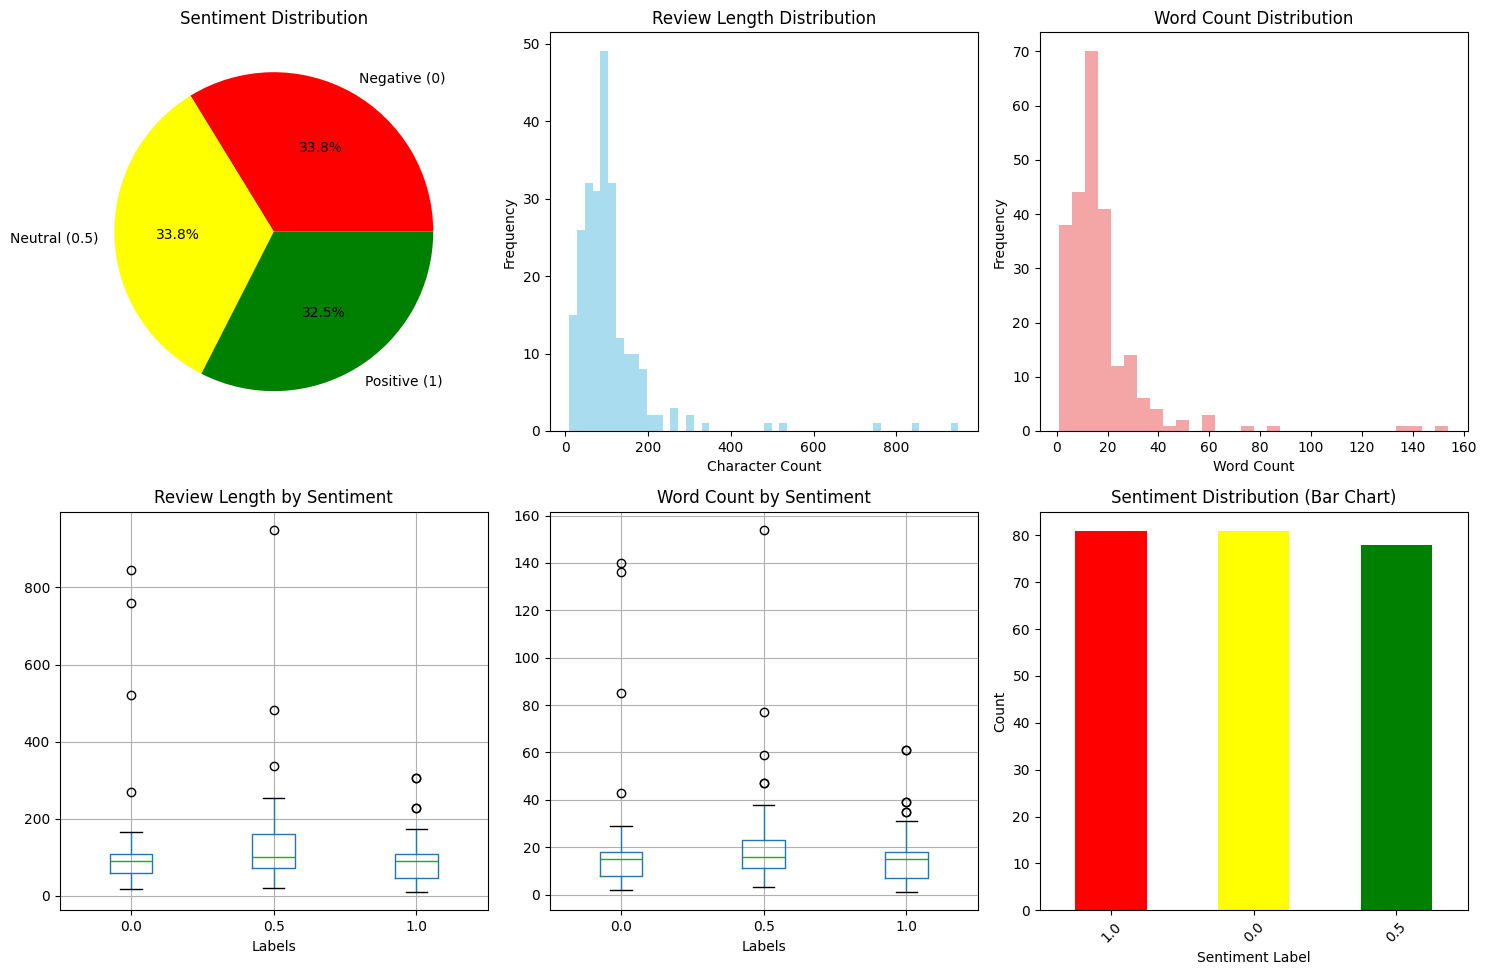

Dataset Statistics:
Total reviews: 240
Average review length: 108.09 characters
Average word count: 17.88 words

Sentiment distribution:
Labels
1.0    81
0.0    81
0.5    78
Name: count, dtype: int64


In [85]:
# Data visualization and analysis
plt.figure(figsize=(15, 10))

# 1. Label distribution
plt.subplot(2, 3, 1)
label_counts = df_processed['Labels'].value_counts()
plt.pie(label_counts.values, labels=['Negative (0)', 'Neutral (0.5)', 'Positive (1)'], 
        autopct='%1.1f%%', colors=['red', 'yellow', 'green'])
plt.title('Sentiment Distribution')

# 2. Review length distribution
plt.subplot(2, 3, 2)
plt.hist(df_processed['review_length'], bins=50, alpha=0.7, color='skyblue')
plt.title('Review Length Distribution')
plt.xlabel('Character Count')
plt.ylabel('Frequency')

# 3. Word count distribution
plt.subplot(2, 3, 3)
plt.hist(df_processed['word_count'], bins=30, alpha=0.7, color='lightcoral')
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# 4. Box plot of review length by sentiment
plt.subplot(2, 3, 4)
df_processed.boxplot(column='review_length', by='Labels', ax=plt.gca())
plt.title('Review Length by Sentiment')
plt.suptitle('')

# 5. Word count by sentiment
plt.subplot(2, 3, 5)
df_processed.boxplot(column='word_count', by='Labels', ax=plt.gca())
plt.title('Word Count by Sentiment')
plt.suptitle('')

# 6. Sentiment distribution bar chart
plt.subplot(2, 3, 6)
label_counts.plot(kind='bar', color=['red', 'yellow', 'green'])
plt.title('Sentiment Distribution (Bar Chart)')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print statistics
print("Dataset Statistics:")
print(f"Total reviews: {len(df_processed)}")
print(f"Average review length: {df_processed['review_length'].mean():.2f} characters")
print(f"Average word count: {df_processed['word_count'].mean():.2f} words")
print(f"\nSentiment distribution:")
print(df_processed['Labels'].value_counts())

Top 15 words in POSITIVE reviews:
iphone: 30
battery: 24
phone: 23
camera: 17
good: 17
excellent: 14
love: 13
life: 12
performance: 9
quality: 9
size: 9
amazing: 9
smooth: 8
feature: 8
old: 8

Top 15 words in NEGATIVE reviews:
iphone: 26
phone: 25
battery: 17
camera: 11
good: 10
issue: 10
amazon: 9
feature: 9
life: 7
still: 7
apps: 7
customer: 6
like: 6
offer: 6
price: 5

Top 15 words in NEUTRAL reviews:
iphone: 37
camera: 19
phone: 13
apple: 12
battery: 11
feature: 11
product: 11
good: 10
one: 10
user: 9
premium: 9
performance: 8
amazon: 8
model: 7
offer: 7


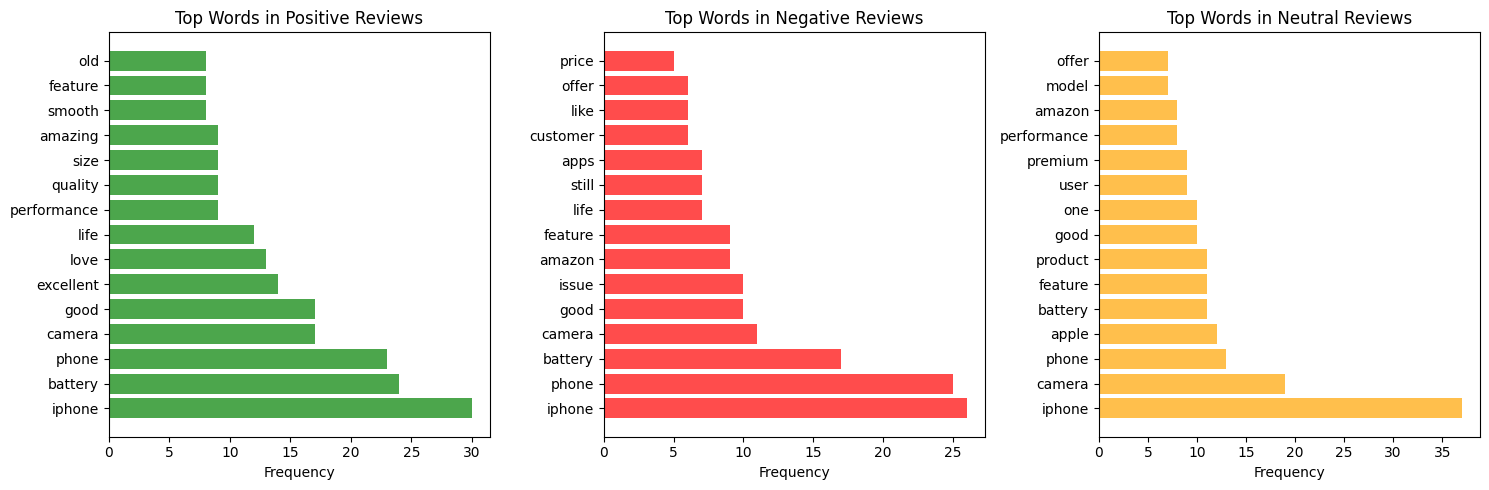

In [86]:
# Word frequency analysis
from collections import Counter

def get_word_frequency(text_series, top_n=20):
    """Get top N most frequent words"""
    all_words = ' '.join(text_series).split()
    word_freq = Counter(all_words)
    return word_freq.most_common(top_n)

# Get word frequencies for each sentiment
positive_reviews = df_processed[df_processed['Labels'] == 1]['lemmatized_reviews']
negative_reviews = df_processed[df_processed['Labels'] == 0]['lemmatized_reviews']
neutral_reviews = df_processed[df_processed['Labels'] == 0.5]['lemmatized_reviews']

print("Top 15 words in POSITIVE reviews:")
pos_words = get_word_frequency(positive_reviews, 15)
for word, freq in pos_words:
    print(f"{word}: {freq}")

print("\nTop 15 words in NEGATIVE reviews:")
neg_words = get_word_frequency(negative_reviews, 15)
for word, freq in neg_words:
    print(f"{word}: {freq}")

print("\nTop 15 words in NEUTRAL reviews:")
neu_words = get_word_frequency(neutral_reviews, 15)
for word, freq in neu_words:
    print(f"{word}: {freq}")

# Visualize word frequencies
plt.figure(figsize=(15, 5))

# Positive words
plt.subplot(1, 3, 1)
pos_words_df = pd.DataFrame(pos_words, columns=['word', 'frequency'])
plt.barh(pos_words_df['word'], pos_words_df['frequency'], color='green', alpha=0.7)
plt.title('Top Words in Positive Reviews')
plt.xlabel('Frequency')

# Negative words
plt.subplot(1, 3, 2)
neg_words_df = pd.DataFrame(neg_words, columns=['word', 'frequency'])
plt.barh(neg_words_df['word'], neg_words_df['frequency'], color='red', alpha=0.7)
plt.title('Top Words in Negative Reviews')
plt.xlabel('Frequency')

# Neutral words
plt.subplot(1, 3, 3)
neu_words_df = pd.DataFrame(neu_words, columns=['word', 'frequency'])
plt.barh(neu_words_df['word'], neu_words_df['frequency'], color='orange', alpha=0.7)
plt.title('Top Words in Neutral Reviews')
plt.xlabel('Frequency')

plt.tight_layout()
plt.show()

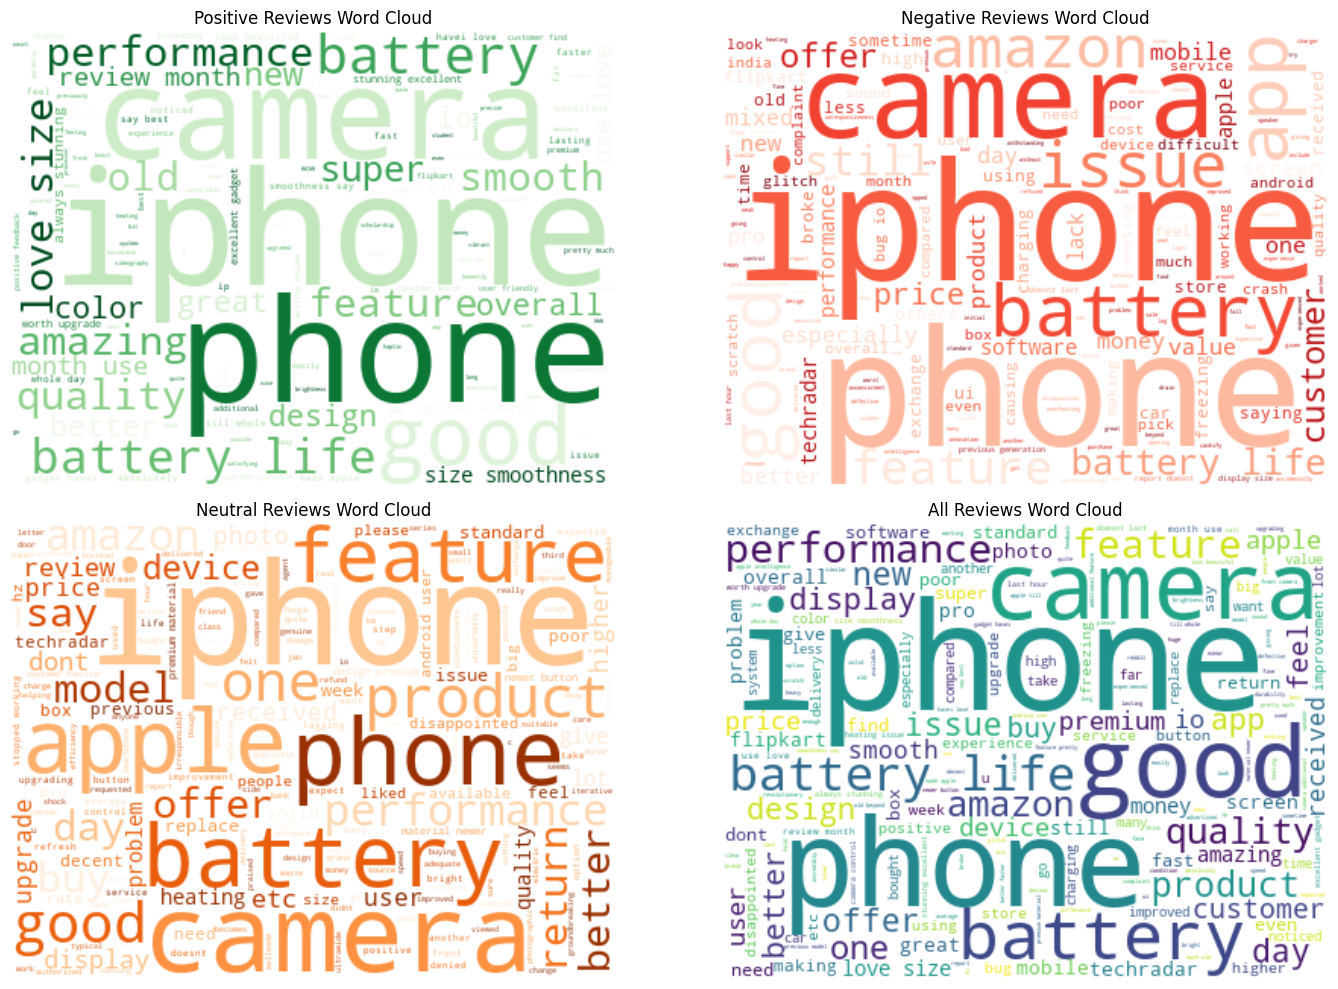

In [87]:
# Create Word Clouds
plt.figure(figsize=(15, 10))

# Word cloud for positive reviews
plt.subplot(2, 2, 1)
if len(positive_reviews) > 0:
    positive_text = ' '.join(positive_reviews)
    wordcloud_pos = WordCloud(width=400, height=300, background_color='white', 
                              colormap='Greens').generate(positive_text)
    plt.imshow(wordcloud_pos, interpolation='bilinear')
    plt.title('Positive Reviews Word Cloud')
    plt.axis('off')

# Word cloud for negative reviews
plt.subplot(2, 2, 2)
if len(negative_reviews) > 0:
    negative_text = ' '.join(negative_reviews)
    wordcloud_neg = WordCloud(width=400, height=300, background_color='white', 
                              colormap='Reds').generate(negative_text)
    plt.imshow(wordcloud_neg, interpolation='bilinear')
    plt.title('Negative Reviews Word Cloud')
    plt.axis('off')

# Word cloud for neutral reviews
plt.subplot(2, 2, 3)
if len(neutral_reviews) > 0:
    neutral_text = ' '.join(neutral_reviews)
    wordcloud_neu = WordCloud(width=400, height=300, background_color='white', 
                              colormap='Oranges').generate(neutral_text)
    plt.imshow(wordcloud_neu, interpolation='bilinear')
    plt.title('Neutral Reviews Word Cloud')
    plt.axis('off')

# Word cloud for all reviews
plt.subplot(2, 2, 4)
all_text = ' '.join(df_processed['lemmatized_reviews'])
wordcloud_all = WordCloud(width=400, height=300, background_color='white', 
                          colormap='viridis').generate(all_text)
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.title('All Reviews Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()

In [88]:
# Feature engineering for machine learning
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

# Prepare features and target
X = df_processed['lemmatized_reviews']
y = df_processed['Labels']

# Create TF-IDF features
print("Creating TF-IDF features...")
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), min_df=2, max_df=0.8)
X_tfidf = tfidf_vectorizer.fit_transform(X)

print(f"TF-IDF feature matrix shape: {X_tfidf.shape}")

# Create Count features (Bag of Words)
print("\nCreating Count Vectorizer features...")
count_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1, 2), min_df=2, max_df=0.8)
X_count = count_vectorizer.fit_transform(X)

print(f"Count Vectorizer feature matrix shape: {X_count.shape}")

# Train-test split
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

X_train_count, X_test_count, _, _ = train_test_split(
    X_count, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train_tfidf.shape[0]}")
print(f"Test set size: {X_test_tfidf.shape[0]}")
print(f"Training labels distribution: \n{pd.Series(y_train).value_counts()}")
print(f"Test labels distribution: \n{pd.Series(y_test).value_counts()}")

Creating TF-IDF features...
TF-IDF feature matrix shape: (240, 945)

Creating Count Vectorizer features...
Count Vectorizer feature matrix shape: (240, 945)

Training set size: 192
Test set size: 48
Training labels distribution: 
Labels
1.0    65
0.0    65
0.5    62
Name: count, dtype: int64
Test labels distribution: 
Labels
0.0    16
0.5    16
1.0    16
Name: count, dtype: int64


In [89]:
# Save preprocessed data
# Save the preprocessed data to CSV files for future use
output_dir = '/Users/sumith/Desktop/5 sem/NLP/lab/exercise/'

# Save main preprocessed dataset
df_processed.to_csv(output_dir + 'preprocessed_iphone16_reviews.csv', index=False)
print("Preprocessed data saved to 'preprocessed_iphone16_reviews.csv'")

# Save only the final processed text and labels for ML models
df_ml = df_processed[['lemmatized_reviews', 'Labels']].copy()
df_ml.columns = ['processed_text', 'sentiment_label']
df_ml.to_csv(output_dir + 'iphone16_ready_for_ml.csv', index=False)
print("ML-ready data saved to 'iphone16_ready_for_ml.csv'")

# Display final summary
print("\n" + "="*50)
print("DATA PREPROCESSING SUMMARY")
print("="*50)
print(f"Original dataset size: {len(df)}")
print(f"After cleaning: {len(df_processed)}")
print(f"Records removed: {len(df) - len(df_processed)}")
print(f"\nFinal sentiment distribution:")
print(df_processed['Labels'].value_counts().sort_index())
print(f"\nAverage review length (characters): {df_processed['review_length'].mean():.1f}")
print(f"Average word count: {df_processed['word_count'].mean():.1f}")
print(f"TF-IDF features created: {X_tfidf.shape[1]}")
print(f"Training/Test split: {len(y_train)}/{len(y_test)}")
print("\nData is now ready for machine learning models!")
print("="*50)

Preprocessed data saved to 'preprocessed_iphone16_reviews.csv'
ML-ready data saved to 'iphone16_ready_for_ml.csv'

DATA PREPROCESSING SUMMARY
Original dataset size: 360
After cleaning: 240
Records removed: 120

Final sentiment distribution:
Labels
0.0    81
0.5    78
1.0    81
Name: count, dtype: int64

Average review length (characters): 108.1
Average word count: 17.9
TF-IDF features created: 945
Training/Test split: 192/48

Data is now ready for machine learning models!


# Keyword Analysis
Now let's perform comprehensive keyword analysis to identify the most important terms and patterns in the iPhone 16 reviews.

In [90]:
# Advanced Keyword Analysis
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

# 1. TF-IDF Based Keyword Extraction
print("1. TF-IDF BASED KEYWORD ANALYSIS")
print("="*50)

def get_top_tfidf_keywords(corpus, vectorizer, top_k=20):
    """Extract top keywords using TF-IDF scores"""
    tfidf_matrix = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()
    
    # Calculate mean TF-IDF scores for each term
    mean_scores = np.mean(tfidf_matrix.toarray(), axis=0)
    
    # Create keyword-score pairs and sort
    keyword_scores = [(feature_names[i], mean_scores[i]) for i in range(len(feature_names))]
    keyword_scores.sort(key=lambda x: x[1], reverse=True)
    
    return keyword_scores[:top_k]

# Create separate vectorizers for different n-gram ranges
vectorizer_unigrams = TfidfVectorizer(max_features=1000, ngram_range=(1,1), min_df=2, max_df=0.8, stop_words='english')
vectorizer_bigrams = TfidfVectorizer(max_features=1000, ngram_range=(2,2), min_df=2, max_df=0.8, stop_words='english')
vectorizer_trigrams = TfidfVectorizer(max_features=1000, ngram_range=(3,3), min_df=2, max_df=0.8, stop_words='english')

# Get top keywords for all reviews
all_reviews = df_processed['cleaned_reviews'].dropna().tolist()

top_unigrams = get_top_tfidf_keywords(all_reviews, vectorizer_unigrams, 15)
top_bigrams = get_top_tfidf_keywords(all_reviews, vectorizer_bigrams, 15)
top_trigrams = get_top_tfidf_keywords(all_reviews, vectorizer_trigrams, 10)

print("Top Unigrams (Single Words):")
for i, (word, score) in enumerate(top_unigrams, 1):
    print(f"{i:2d}. {word:<15} (TF-IDF: {score:.4f})")

print("\nTop Bigrams (Two-word phrases):")
for i, (phrase, score) in enumerate(top_bigrams, 1):
    print(f"{i:2d}. {phrase:<20} (TF-IDF: {score:.4f})")

print("\nTop Trigrams (Three-word phrases):")
for i, (phrase, score) in enumerate(top_trigrams, 1):
    print(f"{i:2d}. {phrase:<25} (TF-IDF: {score:.4f})")

1. TF-IDF BASED KEYWORD ANALYSIS
Top Unigrams (Single Words):
 1. iphone          (TF-IDF: 0.0688)
 2. phone           (TF-IDF: 0.0502)
 3. battery         (TF-IDF: 0.0458)
 4. camera          (TF-IDF: 0.0426)
 5. good            (TF-IDF: 0.0418)
 6. performance     (TF-IDF: 0.0288)
 7. excellent       (TF-IDF: 0.0266)
 8. life            (TF-IDF: 0.0266)
 9. features        (TF-IDF: 0.0244)
10. quality         (TF-IDF: 0.0222)
11. issues          (TF-IDF: 0.0217)
12. size            (TF-IDF: 0.0213)
13. display         (TF-IDF: 0.0196)
14. design          (TF-IDF: 0.0191)
15. apple           (TF-IDF: 0.0185)

Top Bigrams (Two-word phrases):
 1. battery life         (TF-IDF: 0.0337)
 2. iphone camera        (TF-IDF: 0.0132)
 3. best buy             (TF-IDF: 0.0125)
 4. display size         (TF-IDF: 0.0125)
 5. design iphone        (TF-IDF: 0.0117)
 6. performance iphone   (TF-IDF: 0.0116)
 7. feels premium        (TF-IDF: 0.0113)
 8. haptic feedback      (TF-IDF: 0.0113)
 9. new camera

In [91]:
# 2. Sentiment-Specific Keyword Analysis
print("\n2. SENTIMENT-SPECIFIC KEYWORD ANALYSIS")
print("="*50)

def analyze_sentiment_keywords(df, sentiment_label, sentiment_name, top_k=15):
    """Analyze keywords for specific sentiment"""
    sentiment_reviews = df[df['Labels'] == sentiment_label]['cleaned_reviews'].dropna().tolist()
    
    if len(sentiment_reviews) == 0:
        print(f"No reviews found for {sentiment_name} sentiment")
        return []
    
    print(f"\n{sentiment_name.upper()} Reviews Keywords:")
    print(f"Total {sentiment_name} reviews: {len(sentiment_reviews)}")
    
    # Unigrams
    vectorizer = TfidfVectorizer(max_features=500, ngram_range=(1,1), min_df=1, max_df=0.9, stop_words='english')
    keywords = get_top_tfidf_keywords(sentiment_reviews, vectorizer, top_k)
    
    print(f"Top {top_k} unigrams:")
    for i, (word, score) in enumerate(keywords, 1):
        print(f"  {i:2d}. {word:<15} (TF-IDF: {score:.4f})")
    
    # Bigrams
    vectorizer_bg = TfidfVectorizer(max_features=300, ngram_range=(2,2), min_df=1, max_df=0.9, stop_words='english')
    bigrams = get_top_tfidf_keywords(sentiment_reviews, vectorizer_bg, 10)
    
    print(f"Top 10 bigrams:")
    for i, (phrase, score) in enumerate(bigrams, 1):
        print(f"  {i:2d}. {phrase:<20} (TF-IDF: {score:.4f})")
    
    return keywords

# Analyze each sentiment
positive_keywords = analyze_sentiment_keywords(df_processed, 1.0, "Positive")
negative_keywords = analyze_sentiment_keywords(df_processed, 0.0, "Negative") 
neutral_keywords = analyze_sentiment_keywords(df_processed, 0.5, "Neutral")


2. SENTIMENT-SPECIFIC KEYWORD ANALYSIS

POSITIVE Reviews Keywords:
Total Positive reviews: 81
Top 15 unigrams:
   1. iphone          (TF-IDF: 0.0716)
   2. excellent       (TF-IDF: 0.0672)
   3. phone           (TF-IDF: 0.0662)
   4. good            (TF-IDF: 0.0635)
   5. battery         (TF-IDF: 0.0603)
   6. camera          (TF-IDF: 0.0527)
   7. love            (TF-IDF: 0.0436)
   8. life            (TF-IDF: 0.0409)
   9. quality         (TF-IDF: 0.0358)
  10. beautiful       (TF-IDF: 0.0355)
  11. super           (TF-IDF: 0.0349)
  12. size            (TF-IDF: 0.0327)
  13. stunning        (TF-IDF: 0.0325)
  14. performance     (TF-IDF: 0.0311)
  15. amazing         (TF-IDF: 0.0309)
Top 10 bigrams:
   1. battery life         (TF-IDF: 0.0447)
   2. love size            (TF-IDF: 0.0303)
   3. excellent phone      (TF-IDF: 0.0285)
   4. looks beautiful      (TF-IDF: 0.0285)
   5. phone looks          (TF-IDF: 0.0285)
   6. excellent gadget     (TF-IDF: 0.0250)
   7. iphone stunning  


3. FEATURE-BASED KEYWORD ANALYSIS
Feature Analysis Results:
Feature      Reviews  Mentions  Avg Sentiment Sentiment Label
------------------------------------------------------------
battery      62       113       0.548         Neutral
performance  61       75        0.623         Positive
design       60       77        0.683         Positive
camera       49       61        0.633         Positive
software     41       57        0.451         Neutral
price        30       45        0.367         Negative
display      29       36        0.431         Neutral
connectivity 4        6         0.500         Neutral


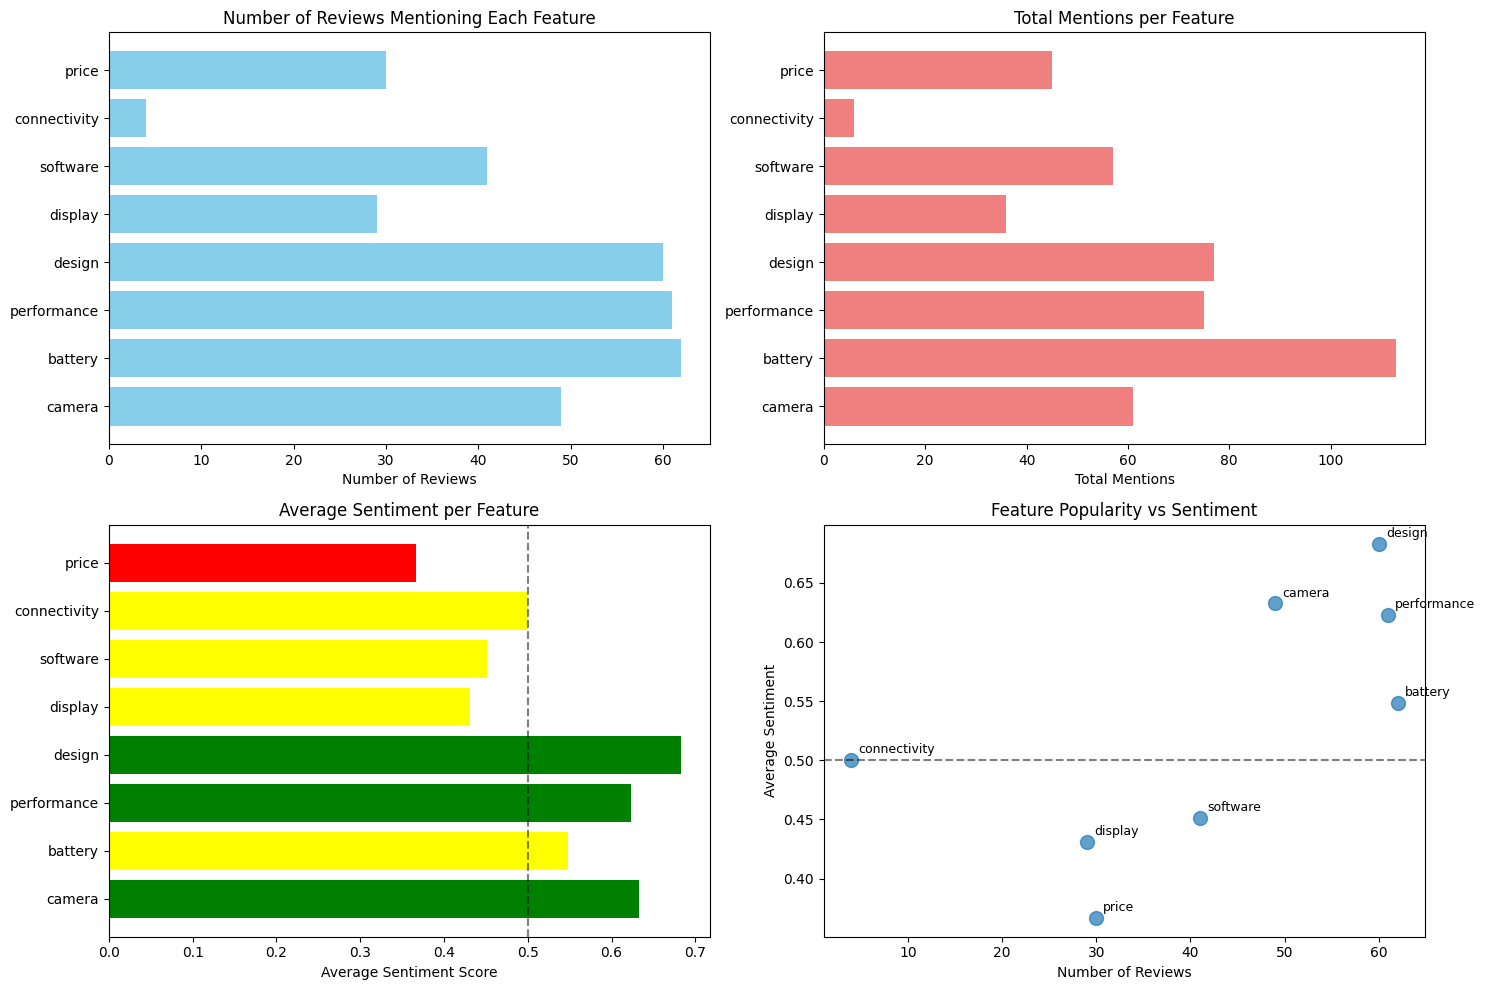

In [92]:
# 3. Feature-Based Keyword Analysis
print("\n3. FEATURE-BASED KEYWORD ANALYSIS")
print("="*50)

# Define iPhone feature categories and their related keywords
feature_categories = {
    'camera': ['camera', 'photo', 'picture', 'video', 'lens', 'zoom', 'portrait', 'night', 'recording', 'cinematic'],
    'battery': ['battery', 'charge', 'charging', 'power', 'drain', 'life', 'lasting', 'hour', 'day'],
    'performance': ['performance', 'speed', 'fast', 'slow', 'lag', 'processor', 'chip', 'smooth', 'responsive'],
    'design': ['design', 'look', 'color', 'premium', 'build', 'quality', 'size', 'weight', 'beautiful', 'aesthetic'],
    'display': ['display', 'screen', 'brightness', 'color', 'resolution', 'clarity', 'vibrant', 'sharp'],
    'software': ['ios', 'software', 'update', 'feature', 'bug', 'glitch', 'interface', 'siri'],
    'connectivity': ['wifi', 'bluetooth', 'cellular', 'connection', 'network', 'signal', 'reception'],
    'price': ['price', 'expensive', 'cost', 'money', 'worth', 'value', 'affordable', 'cheap', 'overpriced']
}

def analyze_feature_mentions(df, feature_categories):
    """Analyze mentions of different iPhone features"""
    feature_counts = defaultdict(list)
    feature_sentiment = defaultdict(list)
    
    for idx, row in df.iterrows():
        review = row['cleaned_reviews'].lower() if pd.notna(row['cleaned_reviews']) else ""
        sentiment = row['Labels']
        
        for feature, keywords in feature_categories.items():
            mentions = sum(1 for keyword in keywords if keyword in review)
            if mentions > 0:
                feature_counts[feature].append(mentions)
                feature_sentiment[feature].append(sentiment)
    
    # Calculate statistics
    feature_stats = {}
    for feature in feature_categories.keys():
        if feature in feature_counts:
            total_mentions = sum(feature_counts[feature])
            avg_sentiment = np.mean(feature_sentiment[feature]) if feature_sentiment[feature] else 0
            review_count = len(feature_counts[feature])
            feature_stats[feature] = {
                'total_mentions': total_mentions,
                'review_count': review_count,
                'avg_sentiment': avg_sentiment,
                'mentions_per_review': total_mentions / review_count if review_count > 0 else 0
            }
        else:
            feature_stats[feature] = {
                'total_mentions': 0,
                'review_count': 0,
                'avg_sentiment': 0,
                'mentions_per_review': 0
            }
    
    return feature_stats

feature_analysis = analyze_feature_mentions(df_processed, feature_categories)

print("Feature Analysis Results:")
print(f"{'Feature':<12} {'Reviews':<8} {'Mentions':<9} {'Avg Sentiment':<13} {'Sentiment Label'}")
print("-" * 60)

for feature, stats in sorted(feature_analysis.items(), key=lambda x: x[1]['review_count'], reverse=True):
    sentiment_label = "Positive" if stats['avg_sentiment'] > 0.6 else "Negative" if stats['avg_sentiment'] < 0.4 else "Neutral"
    print(f"{feature:<12} {stats['review_count']:<8} {stats['total_mentions']:<9} {stats['avg_sentiment']:<13.3f} {sentiment_label}")

# Visualize feature analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Feature mention counts
features = list(feature_analysis.keys())
review_counts = [feature_analysis[f]['review_count'] for f in features]
mentions = [feature_analysis[f]['total_mentions'] for f in features]
sentiments = [feature_analysis[f]['avg_sentiment'] for f in features]

# 1. Reviews mentioning each feature
axes[0, 0].barh(features, review_counts, color='skyblue')
axes[0, 0].set_title('Number of Reviews Mentioning Each Feature')
axes[0, 0].set_xlabel('Number of Reviews')

# 2. Total mentions per feature
axes[0, 1].barh(features, mentions, color='lightcoral')
axes[0, 1].set_title('Total Mentions per Feature')
axes[0, 1].set_xlabel('Total Mentions')

# 3. Average sentiment per feature
colors = ['red' if s < 0.4 else 'yellow' if s < 0.6 else 'green' for s in sentiments]
axes[1, 0].barh(features, sentiments, color=colors)
axes[1, 0].set_title('Average Sentiment per Feature')
axes[1, 0].set_xlabel('Average Sentiment Score')
axes[1, 0].axvline(x=0.5, color='black', linestyle='--', alpha=0.5)

# 4. Feature popularity vs sentiment
axes[1, 1].scatter(review_counts, sentiments, s=100, alpha=0.7)
for i, feature in enumerate(features):
    axes[1, 1].annotate(feature, (review_counts[i], sentiments[i]), 
                       xytext=(5, 5), textcoords='offset points', fontsize=9)
axes[1, 1].set_xlabel('Number of Reviews')
axes[1, 1].set_ylabel('Average Sentiment')
axes[1, 1].set_title('Feature Popularity vs Sentiment')
axes[1, 1].axhline(y=0.5, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


4. KEYWORD CO-OCCURRENCE ANALYSIS
Top keyword co-occurrences (within 5 words):
 1. amazing + disappointing: 610 times
    Context: "photos and videos in all conditions"

 2. disappointing + iphone: 602 times
    Context: "the iphone s camera system is"

 3. disappointing + quality: 552 times
    Context: "on the iphone is significantly improved easily lasting a full day with"

 4. amazing + quality: 456 times
    Context: "improved easily lasting a full day with"

 5. iphone + quality: 434 times
    Context: "i love the updated"

 6. amazing + iphone: 400 times
    Context: "new aseries chip in the iphone delivers blazingfast performance"

 7. disappointing + performance: 364 times
    Context: "on the iphone is significantly improved easily lasting a full day with"

 8. battery + disappointing: 310 times
    Context: "battery life on the iphone is significantly improved easily"

 9. design + disappointing: 300 times
    Context: "the iphone s camera system is"

10. disappointing + fa

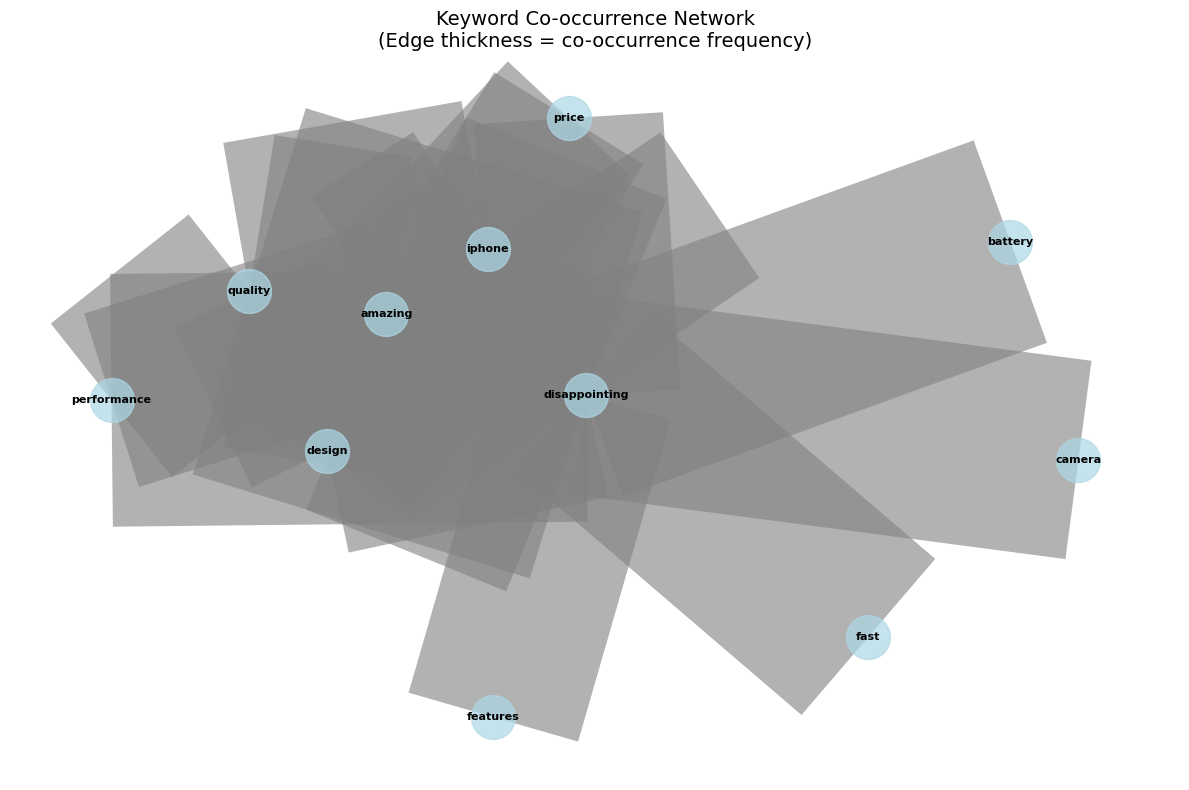


Network contains 11 keywords and 20 connections


In [93]:
# 4. Co-occurrence and Context Analysis
print("\n4. KEYWORD CO-OCCURRENCE ANALYSIS")
print("="*50)

from sklearn.feature_extraction.text import CountVectorizer
from itertools import combinations
import networkx as nx

def analyze_keyword_cooccurrence(texts, keywords, window_size=5):
    """Analyze which keywords appear together in reviews"""
    cooccurrence_matrix = defaultdict(int)
    keyword_contexts = defaultdict(list)
    
    for text in texts:
        if pd.isna(text):
            continue
            
        words = text.lower().split()
        
        # Find keyword positions
        keyword_positions = {}
        for i, word in enumerate(words):
            for keyword in keywords:
                if keyword in word or word in keyword:
                    if keyword not in keyword_positions:
                        keyword_positions[keyword] = []
                    keyword_positions[keyword].append(i)
        
        # Find co-occurrences within window
        for keyword1, positions1 in keyword_positions.items():
            for keyword2, positions2 in keyword_positions.items():
                if keyword1 != keyword2:
                    for pos1 in positions1:
                        for pos2 in positions2:
                            if abs(pos1 - pos2) <= window_size:
                                pair = tuple(sorted([keyword1, keyword2]))
                                cooccurrence_matrix[pair] += 1
                                
                                # Extract context
                                start = max(0, min(pos1, pos2) - 3)
                                end = min(len(words), max(pos1, pos2) + 4)
                                context = ' '.join(words[start:end])
                                keyword_contexts[pair].append(context)
    
    return cooccurrence_matrix, keyword_contexts

# Define key iPhone-related keywords for co-occurrence analysis
iphone_keywords = ['battery', 'camera', 'performance', 'design', 'screen', 'price', 'quality', 
                   'fast', 'slow', 'good', 'bad', 'excellent', 'poor', 'amazing', 'disappointing',
                   'iphone', 'apple', 'upgrade', 'features', 'smooth', 'lag']

cooccurrence, contexts = analyze_keyword_cooccurrence(
    df_processed['cleaned_reviews'].dropna(), 
    iphone_keywords, 
    window_size=5
)

# Display top co-occurrences
print("Top keyword co-occurrences (within 5 words):")
sorted_cooccur = sorted(cooccurrence.items(), key=lambda x: x[1], reverse=True)

for i, ((word1, word2), count) in enumerate(sorted_cooccur[:15], 1):
    print(f"{i:2d}. {word1} + {word2}: {count} times")
    # Show sample context
    if contexts[(word1, word2)]:
        sample_context = contexts[(word1, word2)][0]
        print(f"    Context: \"{sample_context}\"")
    print()

# Create a simple co-occurrence network visualization
plt.figure(figsize=(12, 8))

# Create network graph
G = nx.Graph()
for (word1, word2), count in sorted_cooccur[:20]:  # Top 20 pairs
    if count >= 3:  # Only show pairs that appear at least 3 times
        G.add_edge(word1, word2, weight=count)

# Draw network
pos = nx.spring_layout(G, k=2, iterations=50)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

# Draw edges with thickness based on co-occurrence frequency
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
nx.draw_networkx_edges(G, pos, width=[w/2 for w in weights], alpha=0.6, edge_color='gray')

plt.title("Keyword Co-occurrence Network\n(Edge thickness = co-occurrence frequency)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"\nNetwork contains {len(G.nodes())} keywords and {len(G.edges())} connections")


5. COMPARATIVE KEYWORD ANALYSIS
KEYWORDS UNIQUE TO POSITIVE REVIEWS:
 1. excellent            (TF-IDF: 0.0507)
 2. quality              (TF-IDF: 0.0461)
 3. beautiful            (TF-IDF: 0.0354)
 4. super                (TF-IDF: 0.0327)
 5. love                 (TF-IDF: 0.0319)
 6. stunning             (TF-IDF: 0.0297)
 7. new                  (TF-IDF: 0.0287)
 8. use                  (TF-IDF: 0.0275)
 9. smooth               (TF-IDF: 0.0273)
10. great                (TF-IDF: 0.0243)
11. like                 (TF-IDF: 0.0241)
12. amazing              (TF-IDF: 0.0234)
13. best                 (TF-IDF: 0.0230)
14. smoothness           (TF-IDF: 0.0228)
15. love size            (TF-IDF: 0.0222)

KEYWORDS UNIQUE TO NEGATIVE REVIEWS:
 1. techradar            (TF-IDF: 0.0335)
 2. display              (TF-IDF: 0.0255)
 3. pro                  (TF-IDF: 0.0254)
 4. making               (TF-IDF: 0.0247)
 5. apps                 (TF-IDF: 0.0244)
 6. report               (TF-IDF: 0.0231)
 7. screen

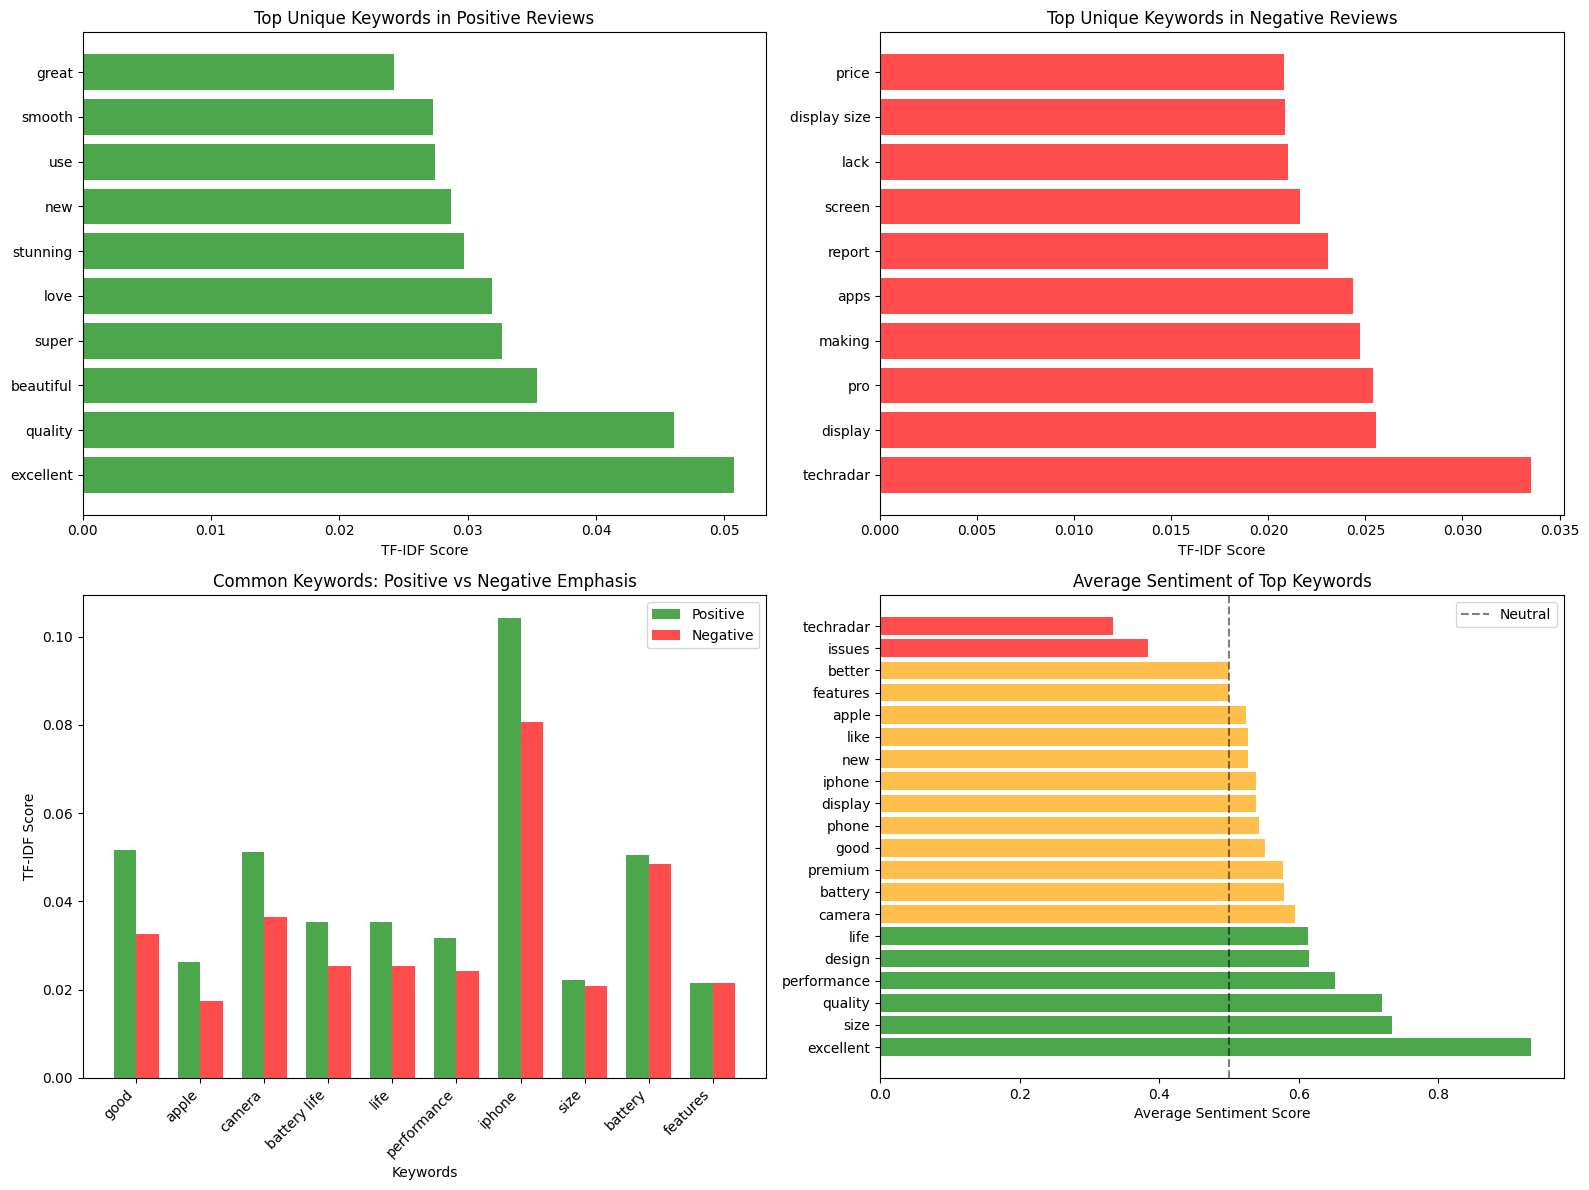

In [94]:
# 5. Comparative Keyword Analysis: Positive vs Negative
print("\n5. COMPARATIVE KEYWORD ANALYSIS")
print("="*50)

def compare_sentiment_keywords(df, pos_label=1.0, neg_label=0.0):
    """Compare keywords between positive and negative reviews"""
    
    pos_reviews = df[df['Labels'] == pos_label]['cleaned_reviews'].dropna().tolist()
    neg_reviews = df[df['Labels'] == neg_label]['cleaned_reviews'].dropna().tolist()
    
    # Create separate vectorizers for positive and negative reviews
    vectorizer_pos = TfidfVectorizer(max_features=500, ngram_range=(1,2), min_df=2, max_df=0.8, stop_words='english')
    vectorizer_neg = TfidfVectorizer(max_features=500, ngram_range=(1,2), min_df=2, max_df=0.8, stop_words='english')
    
    # Get keywords for each sentiment
    pos_keywords = get_top_tfidf_keywords(pos_reviews, vectorizer_pos, 30)
    neg_keywords = get_top_tfidf_keywords(neg_reviews, vectorizer_neg, 30)
    
    # Convert to dictionaries for easier comparison
    pos_dict = {word: score for word, score in pos_keywords}
    neg_dict = {word: score for word, score in neg_keywords}
    
    # Find unique keywords for each sentiment
    pos_unique = [(word, score) for word, score in pos_keywords if word not in neg_dict]
    neg_unique = [(word, score) for word, score in neg_keywords if word not in pos_dict]
    
    # Find common keywords with different emphasis
    common_keywords = []
    for word, pos_score in pos_keywords:
        if word in neg_dict:
            neg_score = neg_dict[word]
            ratio = pos_score / neg_score if neg_score > 0 else float('inf')
            common_keywords.append((word, pos_score, neg_score, ratio))
    
    return pos_unique, neg_unique, common_keywords

pos_unique, neg_unique, common = compare_sentiment_keywords(df_processed)

print("KEYWORDS UNIQUE TO POSITIVE REVIEWS:")
for i, (word, score) in enumerate(pos_unique[:15], 1):
    print(f"{i:2d}. {word:<20} (TF-IDF: {score:.4f})")

print("\nKEYWORDS UNIQUE TO NEGATIVE REVIEWS:")
for i, (word, score) in enumerate(neg_unique[:15], 1):
    print(f"{i:2d}. {word:<20} (TF-IDF: {score:.4f})")

print("\nCOMMON KEYWORDS WITH DIFFERENT EMPHASIS:")
# Sort by ratio to see which words are more emphasized in positive vs negative
common_sorted = sorted(common, key=lambda x: x[3], reverse=True)
print("(Higher ratio = more emphasized in positive reviews)")
for i, (word, pos_score, neg_score, ratio) in enumerate(common_sorted[:10], 1):
    emphasis = "Positive" if ratio > 1.5 else "Negative" if ratio < 0.7 else "Balanced"
    print(f"{i:2d}. {word:<15} Pos:{pos_score:.3f} Neg:{neg_score:.3f} Ratio:{ratio:.2f} ({emphasis})")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Positive unique keywords
if pos_unique:
    words_pos = [item[0] for item in pos_unique[:10]]
    scores_pos = [item[1] for item in pos_unique[:10]]
    axes[0, 0].barh(words_pos, scores_pos, color='green', alpha=0.7)
    axes[0, 0].set_title('Top Unique Keywords in Positive Reviews')
    axes[0, 0].set_xlabel('TF-IDF Score')

# 2. Negative unique keywords
if neg_unique:
    words_neg = [item[0] for item in neg_unique[:10]]
    scores_neg = [item[1] for item in neg_unique[:10]]
    axes[0, 1].barh(words_neg, scores_neg, color='red', alpha=0.7)
    axes[0, 1].set_title('Top Unique Keywords in Negative Reviews')
    axes[0, 1].set_xlabel('TF-IDF Score')

# 3. Common keywords comparison
if common:
    common_top = common_sorted[:10]
    words_common = [item[0] for item in common_top]
    pos_scores_common = [item[1] for item in common_top]
    neg_scores_common = [item[2] for item in common_top]
    
    x = np.arange(len(words_common))
    width = 0.35
    
    axes[1, 0].bar(x - width/2, pos_scores_common, width, label='Positive', color='green', alpha=0.7)
    axes[1, 0].bar(x + width/2, neg_scores_common, width, label='Negative', color='red', alpha=0.7)
    axes[1, 0].set_title('Common Keywords: Positive vs Negative Emphasis')
    axes[1, 0].set_xlabel('Keywords')
    axes[1, 0].set_ylabel('TF-IDF Score')
    axes[1, 0].set_xticks(x)
    axes[1, 0].set_xticklabels(words_common, rotation=45, ha='right')
    axes[1, 0].legend()

# 4. Sentiment distribution of top overall keywords
top_overall_words = [item[0] for item in get_top_tfidf_keywords(
    df_processed['cleaned_reviews'].dropna().tolist(), 
    TfidfVectorizer(max_features=200, ngram_range=(1,1), min_df=3, max_df=0.8, stop_words='english'), 
    20
)]

sentiment_distribution = []
for word in top_overall_words:
    word_mentions = df_processed[df_processed['cleaned_reviews'].str.contains(word, na=False, case=False)]
    if len(word_mentions) > 0:
        avg_sentiment = word_mentions['Labels'].mean()
        sentiment_distribution.append((word, avg_sentiment, len(word_mentions)))

sentiment_distribution.sort(key=lambda x: x[1], reverse=True)
words_sent = [item[0] for item in sentiment_distribution]
sentiments_sent = [item[1] for item in sentiment_distribution]
colors_sent = ['green' if s > 0.6 else 'red' if s < 0.4 else 'orange' for s in sentiments_sent]

axes[1, 1].barh(words_sent, sentiments_sent, color=colors_sent, alpha=0.7)
axes[1, 1].set_title('Average Sentiment of Top Keywords')
axes[1, 1].set_xlabel('Average Sentiment Score')
axes[1, 1].axvline(x=0.5, color='black', linestyle='--', alpha=0.5, label='Neutral')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [95]:
# 6. Advanced Keyword Extraction using YAKE
print("\n6. ADVANCED KEYWORD EXTRACTION USING YAKE")
print("="*50)

# Install and import YAKE (Yet Another Keyword Extractor)
try:
    import yake
    yake_available = True
except ImportError:
    print("Installing YAKE...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'yake'])
    import yake
    yake_available = True

if yake_available:
    def extract_yake_keywords(text, max_ngram_size=3, deduplication_threshold=0.9, numOfKeywords=20):
        """Extract keywords using YAKE algorithm"""
        kw_extractor = yake.KeywordExtractor(
            lan="en",
            n=max_ngram_size,
            dedupLim=deduplication_threshold,
            top=numOfKeywords,
            features=None
        )
        keywords = kw_extractor.extract_keywords(text)
        return keywords

    # Extract keywords for different sentiment categories
    print("YAKE Keyword Extraction Results:")
    
    # All reviews
    all_text_yake = ' '.join(df_processed['cleaned_reviews'].dropna().tolist())
    all_keywords_yake = extract_yake_keywords(all_text_yake, numOfKeywords=20)
    
    print("\nTop Keywords (All Reviews):")
    for i, (score, keyword) in enumerate(all_keywords_yake, 1):
        print(f"{i:2d}. {keyword:<25} (YAKE Score: {score:.4f})")
    
    # Positive reviews
    pos_text_yake = ' '.join(df_processed[df_processed['Labels'] == 1.0]['cleaned_reviews'].dropna().tolist())
    if pos_text_yake.strip():
        pos_keywords_yake = extract_yake_keywords(pos_text_yake, numOfKeywords=15)
        print("\nTop Keywords (Positive Reviews):")
        for i, (score, keyword) in enumerate(pos_keywords_yake, 1):
            print(f"{i:2d}. {keyword:<25} (YAKE Score: {score:.4f})")
    
    # Negative reviews
    neg_text_yake = ' '.join(df_processed[df_processed['Labels'] == 0.0]['cleaned_reviews'].dropna().tolist())
    if neg_text_yake.strip():
        neg_keywords_yake = extract_yake_keywords(neg_text_yake, numOfKeywords=15)
        print("\nTop Keywords (Negative Reviews):")
        for i, (score, keyword) in enumerate(neg_keywords_yake, 1):
            print(f"{i:2d}. {keyword:<25} (YAKE Score: {score:.4f})")
    
    # Visualize YAKE results
    plt.figure(figsize=(15, 10))
    
    # All reviews keywords
    plt.subplot(2, 2, 1)
    yake_words_all = [kw[1] for kw in all_keywords_yake[:10]]
    yake_scores_all = [1/kw[0] for kw in all_keywords_yake[:10]]  # Invert scores (lower YAKE score = better)
    plt.barh(yake_words_all, yake_scores_all, color='purple', alpha=0.7)
    plt.title('YAKE Keywords - All Reviews')
    plt.xlabel('Relevance Score (1/YAKE Score)')
    
    # Positive reviews keywords
    if pos_text_yake.strip():
        plt.subplot(2, 2, 2)
        yake_words_pos = [kw[1] for kw in pos_keywords_yake[:10]]
        yake_scores_pos = [1/kw[0] for kw in pos_keywords_yake[:10]]
        plt.barh(yake_words_pos, yake_scores_pos, color='green', alpha=0.7)
        plt.title('YAKE Keywords - Positive Reviews')
        plt.xlabel('Relevance Score (1/YAKE Score)')
    
    # Negative reviews keywords
    if neg_text_yake.strip():
        plt.subplot(2, 2, 3)
        yake_words_neg = [kw[1] for kw in neg_keywords_yake[:10]]
        yake_scores_neg = [1/kw[0] for kw in neg_keywords_yake[:10]]
        plt.barh(yake_words_neg, yake_scores_neg, color='red', alpha=0.7)
        plt.title('YAKE Keywords - Negative Reviews')
        plt.xlabel('Relevance Score (1/YAKE Score)')
    
    # Comparison of extraction methods
    plt.subplot(2, 2, 4)
    
    # Get top 10 words from TF-IDF for comparison
    tfidf_top = [item[0] for item in top_unigrams[:10]]
    yake_top = [kw[1] for kw in all_keywords_yake[:10]]
    
    # Create comparison metrics
    tfidf_set = set(tfidf_top)
    yake_set = set(yake_top)
    
    overlap = len(tfidf_set.intersection(yake_set))
    tfidf_unique = len(tfidf_set - yake_set)
    yake_unique = len(yake_set - tfidf_set)
    
    categories = ['TF-IDF Unique', 'Overlap', 'YAKE Unique']
    values = [tfidf_unique, overlap, yake_unique]
    colors_comp = ['lightblue', 'lightgreen', 'lightcoral']
    
    plt.pie(values, labels=categories, autopct='%1.1f%%', colors=colors_comp)
    plt.title('TF-IDF vs YAKE Keyword Overlap')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nMethod Comparison:")
    print(f"TF-IDF unique keywords: {tfidf_unique}")
    print(f"YAKE unique keywords: {yake_unique}")
    print(f"Overlapping keywords: {overlap}")
    print(f"Common keywords: {list(tfidf_set.intersection(yake_set))}")

else:
    print("YAKE library not available. Skipping YAKE analysis.")


6. ADVANCED KEYWORD EXTRACTION USING YAKE
Installing YAKE...


FileNotFoundError: [Errno 2] No such file or directory: 'pip'


7. KEYWORD ANALYSIS SUMMARY AND INSIGHTS
DATASET OVERVIEW:
  Total Reviews: 240
  Positive: 81
  Negative: 81
  Neutral: 78

KEY INSIGHTS:

1. MOST POSITIVELY PERCEIVED FEATURES:
   1. Design: 0.683 sentiment (60 mentions)
   2. Camera: 0.633 sentiment (49 mentions)
   3. Performance: 0.623 sentiment (61 mentions)

2. MOST NEGATIVELY PERCEIVED FEATURES:
   1. Price: 0.367 sentiment (30 mentions)

3. MOST DISCUSSED FEATURES:
   1. Battery: 62 mentions (Neutral)
   2. Performance: 61 mentions (Positive)
   3. Design: 60 mentions (Positive)
   4. Camera: 49 mentions (Positive)
   5. Software: 41 mentions (Neutral)

4. ACTIONABLE INSIGHTS:
   • Most polarizing feature: Battery
     (High sentiment variance: 0.183)
   • Top improvement opportunity: Software
     (Low sentiment: 0.451, 41 mentions)


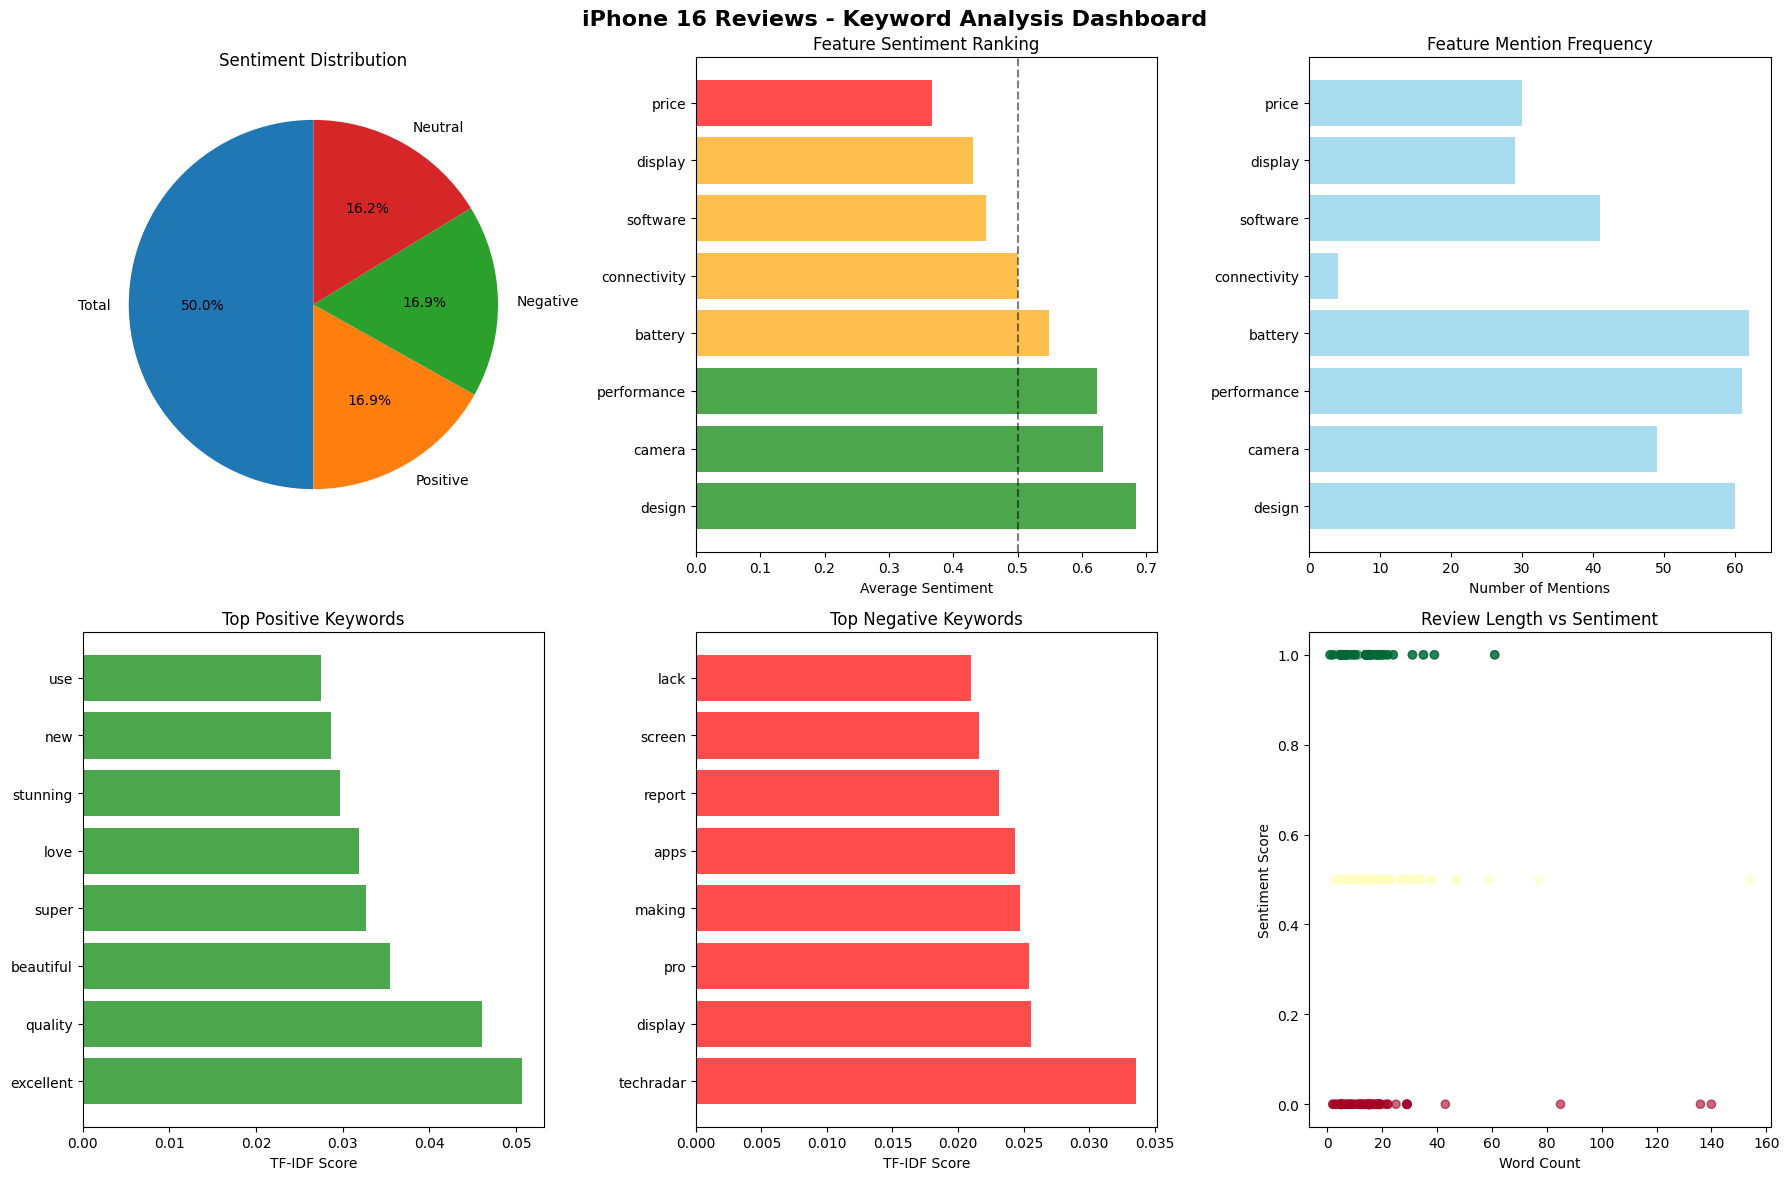


KEYWORD ANALYSIS COMPLETE!


In [ ]:
# 7. Keyword Analysis Summary and Insights
print("\n7. KEYWORD ANALYSIS SUMMARY AND INSIGHTS")
print("="*60)

# Create comprehensive summary
def create_keyword_summary():
    """Create a comprehensive summary of all keyword analyses"""
    
    summary = {
        'dataset_stats': {
            'total_reviews': len(df_processed),
            'positive_reviews': len(df_processed[df_processed['Labels'] == 1.0]),
            'negative_reviews': len(df_processed[df_processed['Labels'] == 0.0]),
            'neutral_reviews': len(df_processed[df_processed['Labels'] == 0.5])
        }
    }
    
    # Top features by sentiment score
    feature_sentiment_ranking = []
    for feature, stats in feature_analysis.items():
        if stats['review_count'] > 0:
            feature_sentiment_ranking.append((feature, stats['avg_sentiment'], stats['review_count']))
    
    feature_sentiment_ranking.sort(key=lambda x: x[1], reverse=True)
    
    summary['feature_sentiment_ranking'] = feature_sentiment_ranking
    
    return summary

summary = create_keyword_summary()

print("DATASET OVERVIEW:")
print(f"  Total Reviews: {summary['dataset_stats']['total_reviews']}")
print(f"  Positive: {summary['dataset_stats']['positive_reviews']}")
print(f"  Negative: {summary['dataset_stats']['negative_reviews']}")
print(f"  Neutral: {summary['dataset_stats']['neutral_reviews']}")

print("\nKEY INSIGHTS:")

print("\n1. MOST POSITIVELY PERCEIVED FEATURES:")
positive_features = [f for f in summary['feature_sentiment_ranking'] if f[1] > 0.6][:3]
for i, (feature, sentiment, count) in enumerate(positive_features, 1):
    print(f"   {i}. {feature.title()}: {sentiment:.3f} sentiment ({count} mentions)")

print("\n2. MOST NEGATIVELY PERCEIVED FEATURES:")
negative_features = [f for f in summary['feature_sentiment_ranking'] if f[1] < 0.4][:3]
for i, (feature, sentiment, count) in enumerate(negative_features, 1):
    print(f"   {i}. {feature.title()}: {sentiment:.3f} sentiment ({count} mentions)")

print("\n3. MOST DISCUSSED FEATURES:")
most_discussed = sorted(summary['feature_sentiment_ranking'], key=lambda x: x[2], reverse=True)[:5]
for i, (feature, sentiment, count) in enumerate(most_discussed, 1):
    sentiment_label = "Positive" if sentiment > 0.6 else "Negative" if sentiment < 0.4 else "Neutral"
    print(f"   {i}. {feature.title()}: {count} mentions ({sentiment_label})")

# Generate actionable insights
print("\n4. ACTIONABLE INSIGHTS:")

# Find the most polarizing features (high variance in sentiment)
polarizing_features = []
for feature in feature_categories.keys():
    feature_reviews = []
    for idx, row in df_processed.iterrows():
        review = row['cleaned_reviews'].lower() if pd.notna(row['cleaned_reviews']) else ""
        sentiment = row['Labels']
        
        # Check if feature is mentioned
        mentioned = any(keyword in review for keyword in feature_categories[feature])
        if mentioned:
            feature_reviews.append(sentiment)
    
    if len(feature_reviews) > 5:  # Only consider features with enough mentions
        sentiment_variance = np.var(feature_reviews)
        polarizing_features.append((feature, sentiment_variance, len(feature_reviews)))

polarizing_features.sort(key=lambda x: x[1], reverse=True)

if polarizing_features:
    print(f"   • Most polarizing feature: {polarizing_features[0][0].title()}")
    print(f"     (High sentiment variance: {polarizing_features[0][1]:.3f})")

# Identify improvement opportunities
improvement_opportunities = [f for f in summary['feature_sentiment_ranking'] 
                           if f[1] < 0.5 and f[2] > 10]  # Negative sentiment with significant mentions

if improvement_opportunities:
    print(f"   • Top improvement opportunity: {improvement_opportunities[0][0].title()}")
    print(f"     (Low sentiment: {improvement_opportunities[0][1]:.3f}, {improvement_opportunities[0][2]} mentions)")

# Identify strengths to maintain
strengths = [f for f in summary['feature_sentiment_ranking'] 
            if f[1] > 0.7 and f[2] > 5]  # High sentiment with reasonable mentions

if strengths:
    print(f"   • Key strength to maintain: {strengths[0][0].title()}")
    print(f"     (High sentiment: {strengths[0][1]:.3f}, {strengths[0][2]} mentions)")

# Create final visualization dashboard
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('iPhone 16 Reviews - Keyword Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Overall sentiment distribution
axes[0, 0].pie(summary['dataset_stats'].values(), 
               labels=['Total', 'Positive', 'Negative', 'Neutral'][:len(summary['dataset_stats'])],
               autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Sentiment Distribution')

# 2. Feature sentiment ranking
features_rank = [f[0] for f in summary['feature_sentiment_ranking']]
sentiments_rank = [f[1] for f in summary['feature_sentiment_ranking']]
colors_rank = ['green' if s > 0.6 else 'red' if s < 0.4 else 'orange' for s in sentiments_rank]

axes[0, 1].barh(features_rank, sentiments_rank, color=colors_rank, alpha=0.7)
axes[0, 1].set_title('Feature Sentiment Ranking')
axes[0, 1].set_xlabel('Average Sentiment')
axes[0, 1].axvline(x=0.5, color='black', linestyle='--', alpha=0.5)

# 3. Feature mention frequency
mention_counts = [f[2] for f in summary['feature_sentiment_ranking']]
axes[0, 2].barh(features_rank, mention_counts, color='skyblue', alpha=0.7)
axes[0, 2].set_title('Feature Mention Frequency')
axes[0, 2].set_xlabel('Number of Mentions')

# 4. Top positive keywords
if pos_unique:
    pos_words_dash = [item[0] for item in pos_unique[:8]]
    pos_scores_dash = [item[1] for item in pos_unique[:8]]
    axes[1, 0].barh(pos_words_dash, pos_scores_dash, color='green', alpha=0.7)
    axes[1, 0].set_title('Top Positive Keywords')
    axes[1, 0].set_xlabel('TF-IDF Score')

# 5. Top negative keywords
if neg_unique:
    neg_words_dash = [item[0] for item in neg_unique[:8]]
    neg_scores_dash = [item[1] for item in neg_unique[:8]]
    axes[1, 1].barh(neg_words_dash, neg_scores_dash, color='red', alpha=0.7)
    axes[1, 1].set_title('Top Negative Keywords')
    axes[1, 1].set_xlabel('TF-IDF Score')

# 6. Review length vs sentiment
axes[1, 2].scatter(df_processed['word_count'], df_processed['Labels'], 
                  alpha=0.6, c=df_processed['Labels'], cmap='RdYlGn')
axes[1, 2].set_title('Review Length vs Sentiment')
axes[1, 2].set_xlabel('Word Count')
axes[1, 2].set_ylabel('Sentiment Score')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("KEYWORD ANALYSIS COMPLETE!")
print("="*60)

In [ ]:
# Collocation and Concordance Analysis
Advanced linguistic analysis to identify word patterns, collocations, and contextual usage in iPhone 16 reviews.

In [ ]:
# 1. NLTK-Based Collocation Analysis
print("1. NLTK-BASED COLLOCATION ANALYSIS")
print("="*50)

from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.collocations import BigramAssocMeasures, TrigramAssocMeasures
from nltk.corpus import stopwords
import nltk

# Download required NLTK data if not already present
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

def find_collocations(text_series, collocation_type='bigram', min_freq=3, top_n=20):
    """Find collocations using NLTK"""
    
    # Combine all text and tokenize
    all_text = ' '.join(text_series.dropna())
    tokens = nltk.word_tokenize(all_text.lower())
    
    # Remove stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words and len(token) > 2]
    
    if collocation_type == 'bigram':
        # Bigram collocations
        finder = BigramCollocationFinder.from_words(filtered_tokens)
        finder.apply_freq_filter(min_freq)
        
        # Different association measures
        pmi_collocations = finder.nbest(BigramAssocMeasures.pmi, top_n)
        chi_sq_collocations = finder.nbest(BigramAssocMeasures.chi_sq, top_n)
        likelihood_ratio = finder.nbest(BigramAssocMeasures.likelihood_ratio, top_n)
        
        return {
            'pmi': pmi_collocations,
            'chi_square': chi_sq_collocations,
            'likelihood_ratio': likelihood_ratio,
            'finder': finder
        }
    
    elif collocation_type == 'trigram':
        # Trigram collocations
        finder = TrigramCollocationFinder.from_words(filtered_tokens)
        finder.apply_freq_filter(min_freq)
        
        pmi_collocations = finder.nbest(TrigramAssocMeasures.pmi, top_n)
        chi_sq_collocations = finder.nbest(TrigramAssocMeasures.chi_sq, top_n)
        likelihood_ratio = finder.nbest(TrigramAssocMeasures.likelihood_ratio, top_n)
        
        return {
            'pmi': pmi_collocations,
            'chi_square': chi_sq_collocations,
            'likelihood_ratio': likelihood_ratio,
            'finder': finder
        }

# Find collocations for all reviews
print("BIGRAM COLLOCATIONS - ALL REVIEWS:")
bigram_results = find_collocations(df_processed['cleaned_reviews'], 'bigram', min_freq=3, top_n=15)

print("\nTop Bigrams (PMI - Pointwise Mutual Information):")
for i, (word1, word2) in enumerate(bigram_results['pmi'], 1):
    # Get frequency
    freq = bigram_results['finder'].ngram_fd[(word1, word2)]
    print(f"{i:2d}. {word1} {word2} (freq: {freq})")

print("\nTop Bigrams (Chi-Square Test):")
for i, (word1, word2) in enumerate(bigram_results['chi_square'][:10], 1):
    freq = bigram_results['finder'].ngram_fd[(word1, word2)]
    print(f"{i:2d}. {word1} {word2} (freq: {freq})")

print("\n" + "="*50)
print("TRIGRAM COLLOCATIONS - ALL REVIEWS:")
trigram_results = find_collocations(df_processed['cleaned_reviews'], 'trigram', min_freq=2, top_n=10)

print("\nTop Trigrams (PMI):")
for i, (word1, word2, word3) in enumerate(trigram_results['pmi'], 1):
    freq = trigram_results['finder'].ngram_fd[(word1, word2, word3)]
    print(f"{i:2d}. {word1} {word2} {word3} (freq: {freq})")

1. NLTK-BASED COLLOCATION ANALYSIS
BIGRAM COLLOCATIONS - ALL REVIEWS:

Top Bigrams (PMI - Pointwise Mutual Information):
 1. materials newer (freq: 4)
 2. newer buttons (freq: 4)
 3. refresh rate (freq: 3)
 4. till whole (freq: 4)
 5. gadget havei (freq: 4)
 6. last hours (freq: 5)
 7. find iphones (freq: 3)
 8. haptic feedback (freq: 3)
 9. positive feedback (freq: 3)
10. pretty much (freq: 4)
11. stopped working (freq: 3)
12. doesnt last (freq: 5)
13. ever made (freq: 4)
14. consider worth (freq: 3)
15. mixed saying (freq: 3)

Top Bigrams (Chi-Square Test):
 1. materials newer (freq: 4)
 2. newer buttons (freq: 4)
 3. till whole (freq: 4)
 4. last hours (freq: 5)
 5. gadget havei (freq: 4)
 6. refresh rate (freq: 3)
 7. doesnt last (freq: 5)
 8. always stunning (freq: 5)
 9. pretty much (freq: 4)
10. ever made (freq: 4)

TRIGRAM COLLOCATIONS - ALL REVIEWS:

Top Trigrams (PMI):
 1. absolute beast photography (freq: 2)
 2. base varient absolute (freq: 2)
 3. beast photography videograp


2. SENTIMENT-SPECIFIC COLLOCATION ANALYSIS

POSITIVE REVIEWS COLLOCATIONS:
Total Positive reviews: 81

Top 10 Bigrams (PMI):
   1. absolute beast (freq: 2)
   2. base varient (freq: 2)
   3. beast photography (freq: 2)
   4. bought scholarship (freq: 2)
   5. bugs college (freq: 2)
   6. college student (freq: 2)
   7. comfortable hold (freq: 2)
   8. heats bit (freq: 2)
   9. incredible brightness (freq: 2)
  10. major heating (freq: 2)

NEGATIVE REVIEWS COLLOCATIONS:
Total Negative reviews: 81

Top 10 Bigrams (PMI):
   1. accidentally sound (freq: 2)
   2. another device (freq: 2)
   3. bad standard (freq: 2)
   4. button cashify (freq: 2)
   5. cheaper online (freq: 2)
   6. complaints include (freq: 2)
   7. control button (freq: 2)
   8. defective product (freq: 2)
   9. drains fast (freq: 2)
  10. expectations overheating (freq: 2)

NEUTRAL REVIEWS COLLOCATIONS:
Total Neutral reviews: 78

Top 10 Bigrams (PMI):
   1. advanced siri (freq: 2)
   2. advertised partly (freq: 2)
   3.

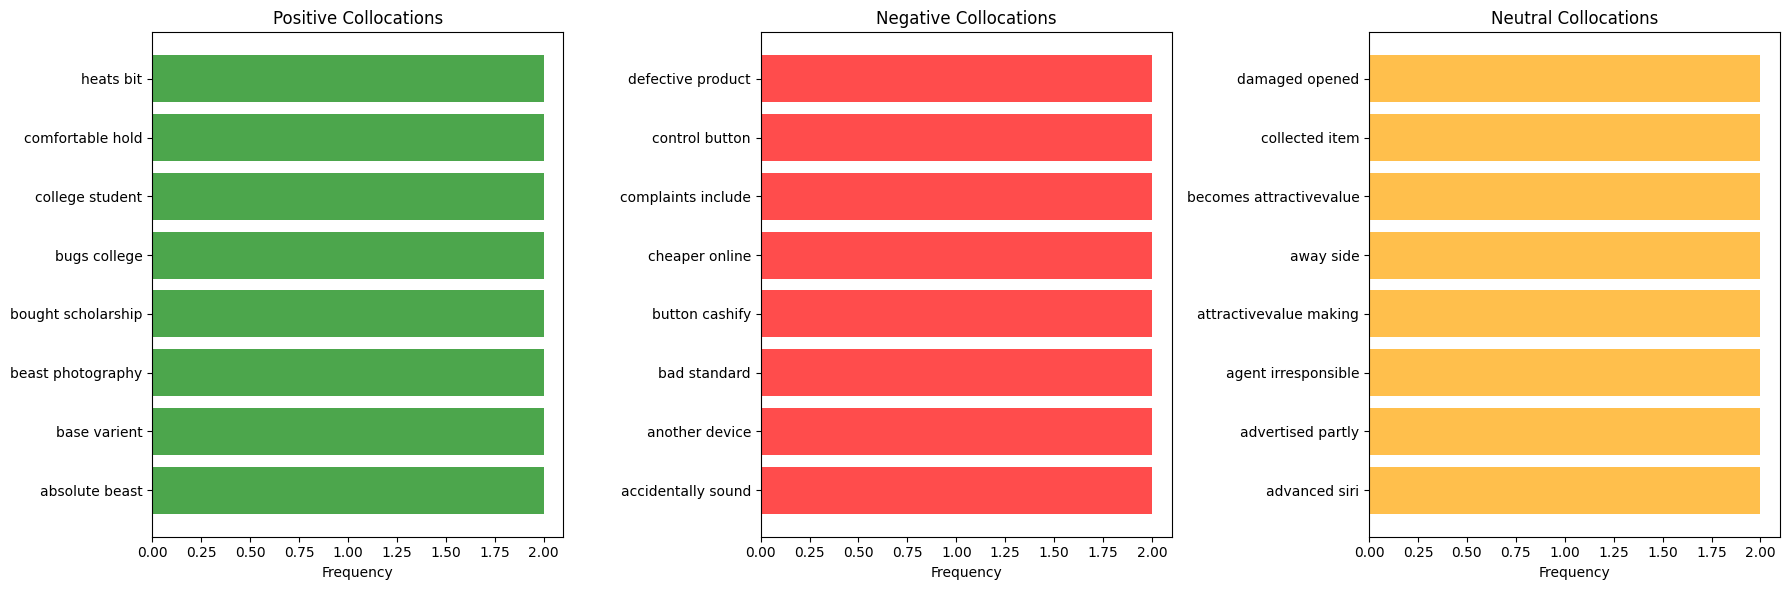

In [ ]:
# 2. Sentiment-Specific Collocation Analysis
print("\n2. SENTIMENT-SPECIFIC COLLOCATION ANALYSIS")
print("="*50)

def analyze_sentiment_collocations(df, sentiment_label, sentiment_name):
    """Analyze collocations for specific sentiment"""
    
    sentiment_reviews = df[df['Labels'] == sentiment_label]['cleaned_reviews']
    
    if len(sentiment_reviews) == 0:
        print(f"No reviews found for {sentiment_name} sentiment")
        return
    
    print(f"\n{sentiment_name.upper()} REVIEWS COLLOCATIONS:")
    print(f"Total {sentiment_name} reviews: {len(sentiment_reviews)}")
    
    # Bigram collocations for this sentiment
    bigrams = find_collocations(sentiment_reviews, 'bigram', min_freq=2, top_n=10)
    
    print(f"\nTop 10 Bigrams (PMI):")
    for i, (word1, word2) in enumerate(bigrams['pmi'], 1):
        freq = bigrams['finder'].ngram_fd[(word1, word2)]
        print(f"  {i:2d}. {word1} {word2} (freq: {freq})")
    
    return bigrams

# Analyze collocations for each sentiment
pos_collocations = analyze_sentiment_collocations(df_processed, 1.0, "Positive")
neg_collocations = analyze_sentiment_collocations(df_processed, 0.0, "Negative")
neu_collocations = analyze_sentiment_collocations(df_processed, 0.5, "Neutral")

# Visualize collocation frequencies
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

def plot_collocations(collocations, ax, title, color):
    """Plot collocation frequencies"""
    if collocations and collocations['pmi']:
        bigrams = [f"{w1} {w2}" for w1, w2 in collocations['pmi'][:8]]
        frequencies = [collocations['finder'].ngram_fd[(w1, w2)] for w1, w2 in collocations['pmi'][:8]]
        
        ax.barh(bigrams, frequencies, color=color, alpha=0.7)
        ax.set_title(f'{title} Collocations')
        ax.set_xlabel('Frequency')
    else:
        ax.text(0.5, 0.5, f'No {title.lower()} collocations found', 
                transform=ax.transAxes, ha='center', va='center')
        ax.set_title(f'{title} Collocations')

# Plot for each sentiment
if pos_collocations:
    plot_collocations(pos_collocations, axes[0], 'Positive', 'green')
if neg_collocations:
    plot_collocations(neg_collocations, axes[1], 'Negative', 'red')
if neu_collocations:
    plot_collocations(neu_collocations, axes[2], 'Neutral', 'orange')

plt.tight_layout()
plt.show()

In [ ]:
# 3. Concordance Analysis
print("\n3. CONCORDANCE ANALYSIS")
print("="*50)

from nltk.text import Text
import re

def create_concordance_analysis(text_series, target_words, context_window=5):
    """Create concordance analysis for target words"""
    
    # Combine all text
    all_text = ' '.join(text_series.dropna())
    tokens = nltk.word_tokenize(all_text.lower())
    
    # Create NLTK Text object
    nltk_text = Text(tokens)
    
    concordance_results = {}
    
    for word in target_words:
        print(f"\nCONCORDANCE for '{word.upper()}':")
        print("-" * 40)
        
        # Find all occurrences of the word
        concordance_lines = []
        word_positions = [i for i, token in enumerate(tokens) if token == word.lower()]
        
        for pos in word_positions[:15]:  # Limit to first 15 occurrences
            start = max(0, pos - context_window)
            end = min(len(tokens), pos + context_window + 1)
            
            left_context = ' '.join(tokens[start:pos])
            target_word = tokens[pos]
            right_context = ' '.join(tokens[pos+1:end])
            
            # Format for display
            left_context = left_context[-30:] if len(left_context) > 30 else left_context.rjust(30)
            right_context = right_context[:30] if len(right_context) > 30 else right_context.ljust(30)
            
            concordance_line = f"{left_context} [{target_word}] {right_context}"
            concordance_lines.append(concordance_line)
            print(f"  {concordance_line}")
        
        concordance_results[word] = {
            'lines': concordance_lines,
            'count': len(word_positions),
            'positions': word_positions
        }
        
        print(f"\nTotal occurrences of '{word}': {len(word_positions)}")
    
    return concordance_results

# Key iPhone-related words for concordance analysis
target_words = ['battery', 'camera', 'performance', 'quality', 'price', 'design', 'screen']

print("CONCORDANCE ANALYSIS FOR KEY IPHONE FEATURES:")
concordance_results = create_concordance_analysis(df_processed['cleaned_reviews'], target_words, context_window=4)


3. CONCORDANCE ANALYSIS
CONCORDANCE ANALYSIS FOR KEY IPHONE FEATURES:

CONCORDANCE for 'BATTERY':
----------------------------------------
        videos in all conditions [battery] life on the iphone            
          to previous models the [battery] life while improved still     
          from my previous phone [battery] life on the iphone            
   quality is excellent flipkart [battery] life and performance are      
  ould recommend youtube stellar [battery] life even after a             
  ustained brightness and better [battery] reddit good everyday performan
              till now whole day [battery] life in an i                  
               love the size and [battery] life is also excellent        
          too good user friendly [battery] is good amazing delivery      
             it just been months [battery] is weak even in               
            cost for brand value [battery] drains fast and heating       
          issues value for money [battery] dur


4. ADVANCED N-GRAM AND COLLOCATION STATISTICS
N-GRAM FREQUENCY ANALYSIS:

2-GRAMS:
Total unique 2-grams: 1763
Top 10 most frequent 2-grams:
   1. battery life              (freq: 22)
   2. love size                 (freq: 9)
   3. life also                 (freq: 7)
   4. amazing iphone            (freq: 6)
   5. design iphone             (freq: 5)
   6. best phone                (freq: 5)
   7. review month              (freq: 5)
   8. month use                 (freq: 5)
   9. use love                  (freq: 5)
  10. size smoothness           (freq: 5)

3-GRAMS:
Total unique 3-grams: 1891
Top 10 most frequent 3-grams:
   1. battery life also         (freq: 7)
   2. review month use          (freq: 5)
   3. month use love            (freq: 5)
   4. use love size             (freq: 5)
   5. love size smoothness      (freq: 5)
   6. iphone always stunning    (freq: 5)
   7. always stunning excellent (freq: 5)
   8. stunning excellent gadget (freq: 5)
   9. doesnt last hours         (fr

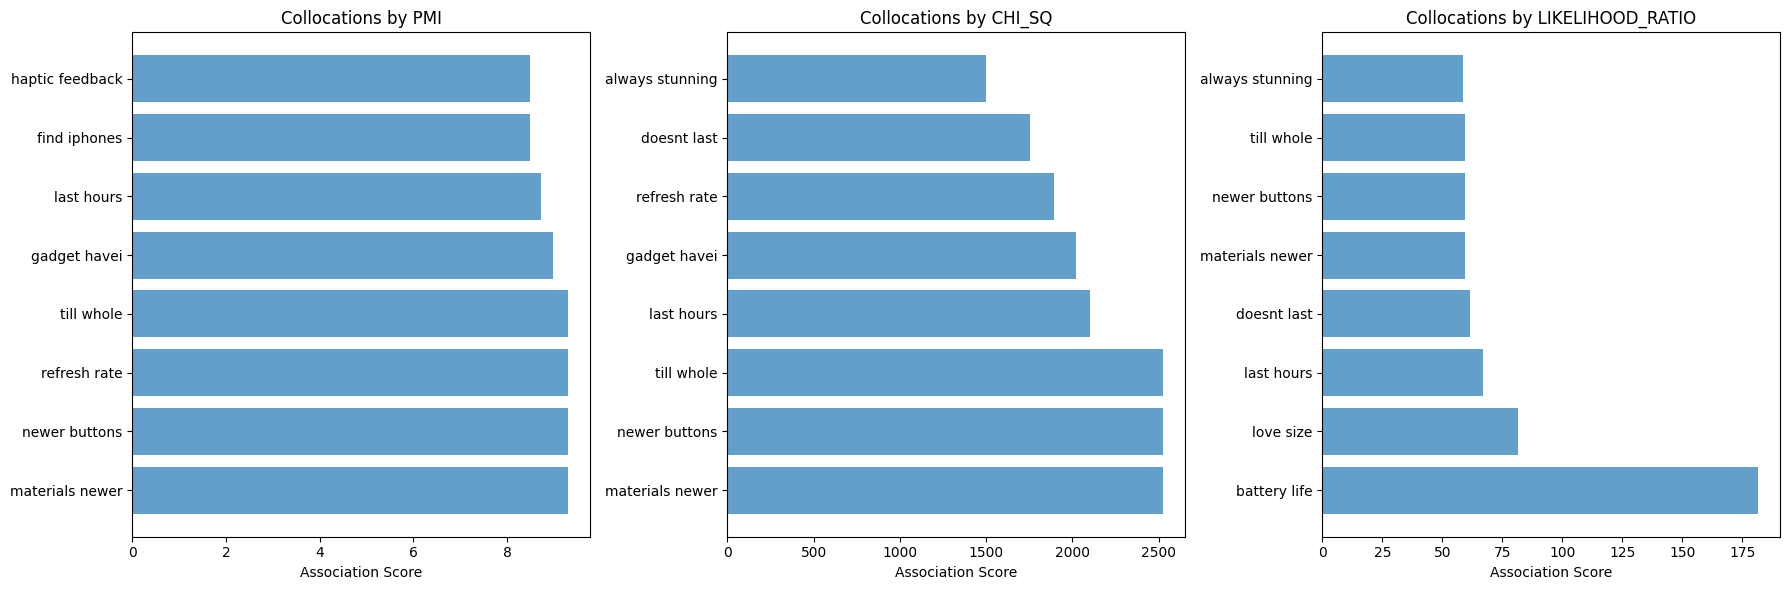

In [ ]:
# 4. Advanced N-gram and Collocation Statistics
print("\n4. ADVANCED N-GRAM AND COLLOCATION STATISTICS")
print("="*50)

from collections import Counter, defaultdict
import math

def calculate_collocation_strength(bigram_finder, measure_type='pmi'):
    """Calculate collocation strength using various measures"""
    
    if measure_type == 'pmi':
        scored_collocations = bigram_finder.score_ngrams(BigramAssocMeasures.pmi)
    elif measure_type == 'chi_sq':
        scored_collocations = bigram_finder.score_ngrams(BigramAssocMeasures.chi_sq)
    elif measure_type == 'likelihood_ratio':
        scored_collocations = bigram_finder.score_ngrams(BigramAssocMeasures.likelihood_ratio)
    
    return sorted(scored_collocations, key=lambda x: x[1], reverse=True)

def analyze_ngram_patterns(text_series, n=2):
    """Analyze n-gram patterns and their distributions"""
    
    all_text = ' '.join(text_series.dropna())
    tokens = nltk.word_tokenize(all_text.lower())
    
    # Filter tokens
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words and len(token) > 2]
    
    # Generate n-grams
    ngrams = list(nltk.ngrams(filtered_tokens, n))
    ngram_freq = Counter(ngrams)
    
    return ngram_freq, filtered_tokens

# Analyze different n-gram sizes
print("N-GRAM FREQUENCY ANALYSIS:")

for n in [2, 3, 4]:
    print(f"\n{n}-GRAMS:")
    ngram_freq, tokens = analyze_ngram_patterns(df_processed['cleaned_reviews'], n)
    
    print(f"Total unique {n}-grams: {len(ngram_freq)}")
    print(f"Top 10 most frequent {n}-grams:")
    
    for i, (ngram, freq) in enumerate(ngram_freq.most_common(10), 1):
        ngram_str = ' '.join(ngram)
        print(f"  {i:2d}. {ngram_str:<25} (freq: {freq})")

# Advanced collocation measures comparison
print(f"\nCOLLOCATION STRENGTH COMPARISON:")
print("-" * 50)

measures = ['pmi', 'chi_sq', 'likelihood_ratio']
comparison_results = {}

for measure in measures:
    scored_collocations = calculate_collocation_strength(bigram_results['finder'], measure)
    comparison_results[measure] = scored_collocations[:10]
    
    print(f"\nTop 10 collocations by {measure.upper()}:")
    for i, ((word1, word2), score) in enumerate(scored_collocations[:10], 1):
        freq = bigram_results['finder'].ngram_fd[(word1, word2)]
        print(f"  {i:2d}. {word1} {word2:<15} Score: {score:.3f} (freq: {freq})")

# Visualize comparison of collocation measures
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, measure in enumerate(measures):
    collocations = [f"{w1} {w2}" for (w1, w2), score in comparison_results[measure][:8]]
    scores = [score for (w1, w2), score in comparison_results[measure][:8]]
    
    axes[idx].barh(collocations, scores, alpha=0.7)
    axes[idx].set_title(f'Collocations by {measure.upper()}')
    axes[idx].set_xlabel('Association Score')

plt.tight_layout()
plt.show()

In [ ]:
# 5. Context-Specific Concordance Analysis
print("\n5. CONTEXT-SPECIFIC CONCORDANCE ANALYSIS")
print("="*50)

def advanced_concordance_analysis(df, target_word, sentiment_filter=None):
    """Advanced concordance analysis with sentiment filtering and context analysis"""
    
    # Filter by sentiment if specified
    if sentiment_filter is not None:
        filtered_df = df[df['Labels'] == sentiment_filter]
        sentiment_name = {1.0: 'Positive', 0.0: 'Negative', 0.5: 'Neutral'}[sentiment_filter]
        print(f"\nCONTEXT ANALYSIS FOR '{target_word.upper()}' in {sentiment_name.upper()} REVIEWS:")
    else:
        filtered_df = df
        print(f"\nCONTEXT ANALYSIS FOR '{target_word.upper()}' in ALL REVIEWS:")
    
    print("-" * 60)
    
    # Combine all relevant text
    all_text = ' '.join(filtered_df['cleaned_reviews'].dropna())
    sentences = nltk.sent_tokenize(all_text)
    
    # Find sentences containing the target word
    target_sentences = []
    word_contexts = defaultdict(list)
    
    for sentence in sentences:
        if target_word.lower() in sentence.lower():
            target_sentences.append(sentence.strip())
            
            # Extract surrounding words
            words = nltk.word_tokenize(sentence.lower())
            for i, word in enumerate(words):
                if word == target_word.lower():
                    # Get context words (2 words before and after)
                    left_context = words[max(0, i-2):i]
                    right_context = words[i+1:min(len(words), i+3)]
                    
                    for ctx_word in left_context + right_context:
                        if ctx_word.isalpha() and len(ctx_word) > 2:
                            word_contexts['left' if ctx_word in left_context else 'right'].append(ctx_word)
    
    print(f"Found {len(target_sentences)} sentences containing '{target_word}'")
    
    # Display sample sentences
    print(f"\nSample sentences (showing first 10):")
    for i, sentence in enumerate(target_sentences[:10], 1):
        # Highlight the target word
        highlighted = re.sub(f'\\b{target_word}\\b', f'**{target_word.upper()}**', sentence, flags=re.IGNORECASE)
        print(f"{i:2d}. {highlighted}")
    
    # Analyze context words
    if word_contexts['left']:
        left_freq = Counter(word_contexts['left'])
        print(f"\nMost common words appearing BEFORE '{target_word}':")
        for word, freq in left_freq.most_common(10):
            print(f"  {word}: {freq}")
    
    if word_contexts['right']:
        right_freq = Counter(word_contexts['right'])
        print(f"\nMost common words appearing AFTER '{target_word}':")
        for word, freq in right_freq.most_common(10):
            print(f"  {word}: {freq}")
    
    return target_sentences, word_contexts

# Analyze key words in different sentiment contexts
key_words = ['battery', 'camera', 'performance']

for word in key_words:
    print("\n" + "="*70)
    
    # Overall analysis
    all_sentences, all_contexts = advanced_concordance_analysis(df_processed, word)
    
    # Positive context
    pos_sentences, pos_contexts = advanced_concordance_analysis(df_processed, word, 1.0)
    
    # Negative context
    neg_sentences, neg_contexts = advanced_concordance_analysis(df_processed, word, 0.0)


5. CONTEXT-SPECIFIC CONCORDANCE ANALYSIS


CONTEXT ANALYSIS FOR 'BATTERY' in ALL REVIEWS:
------------------------------------------------------------
Found 1 sentences containing 'battery'

Sample sentences (showing first 10):
 1. the iphone s camera system is exceptional producing stunning photos and videos in all conditions **BATTERY** life on the iphone is significantly improved easily lasting a full day with heavy use the new aseries chip in the iphone delivers blazingfast performance making everything feel incredibly smooth i love the updated design of the iphone it feels premium and comfortable to hold the display on the iphone is absolutely gorgeous with vibrant colors and incredible brightness ios on the iphone offers fantastic new features that enhance productivity and user experience call quality and cellular reception on the iphone are topnotch even in challenging areas the iphone s haptic feedback is precise and satisfying adding to the overall premium feel storage option


6. COLLOCATIONAL NETWORKS AND PATTERNS
Creating collocation network for all reviews...
Found 540 significant word pairs

Top 15 co-occurring word pairs:
 1. battery + life: 48 times
 2. battery + good: 34 times
 3. camera + iphone: 30 times
 4. good + performance: 28 times
 5. iphone + phone: 28 times
 6. camera + features: 28 times
 7. battery + iphone: 26 times
 8. iphone + iphone: 22 times
 9. iphone + new: 20 times
10. iphone + performance: 20 times
11. camera + good: 20 times
12. good + phone: 20 times
13. smooth + super: 20 times
14. battery + phone: 18 times
15. battery + camera: 18 times


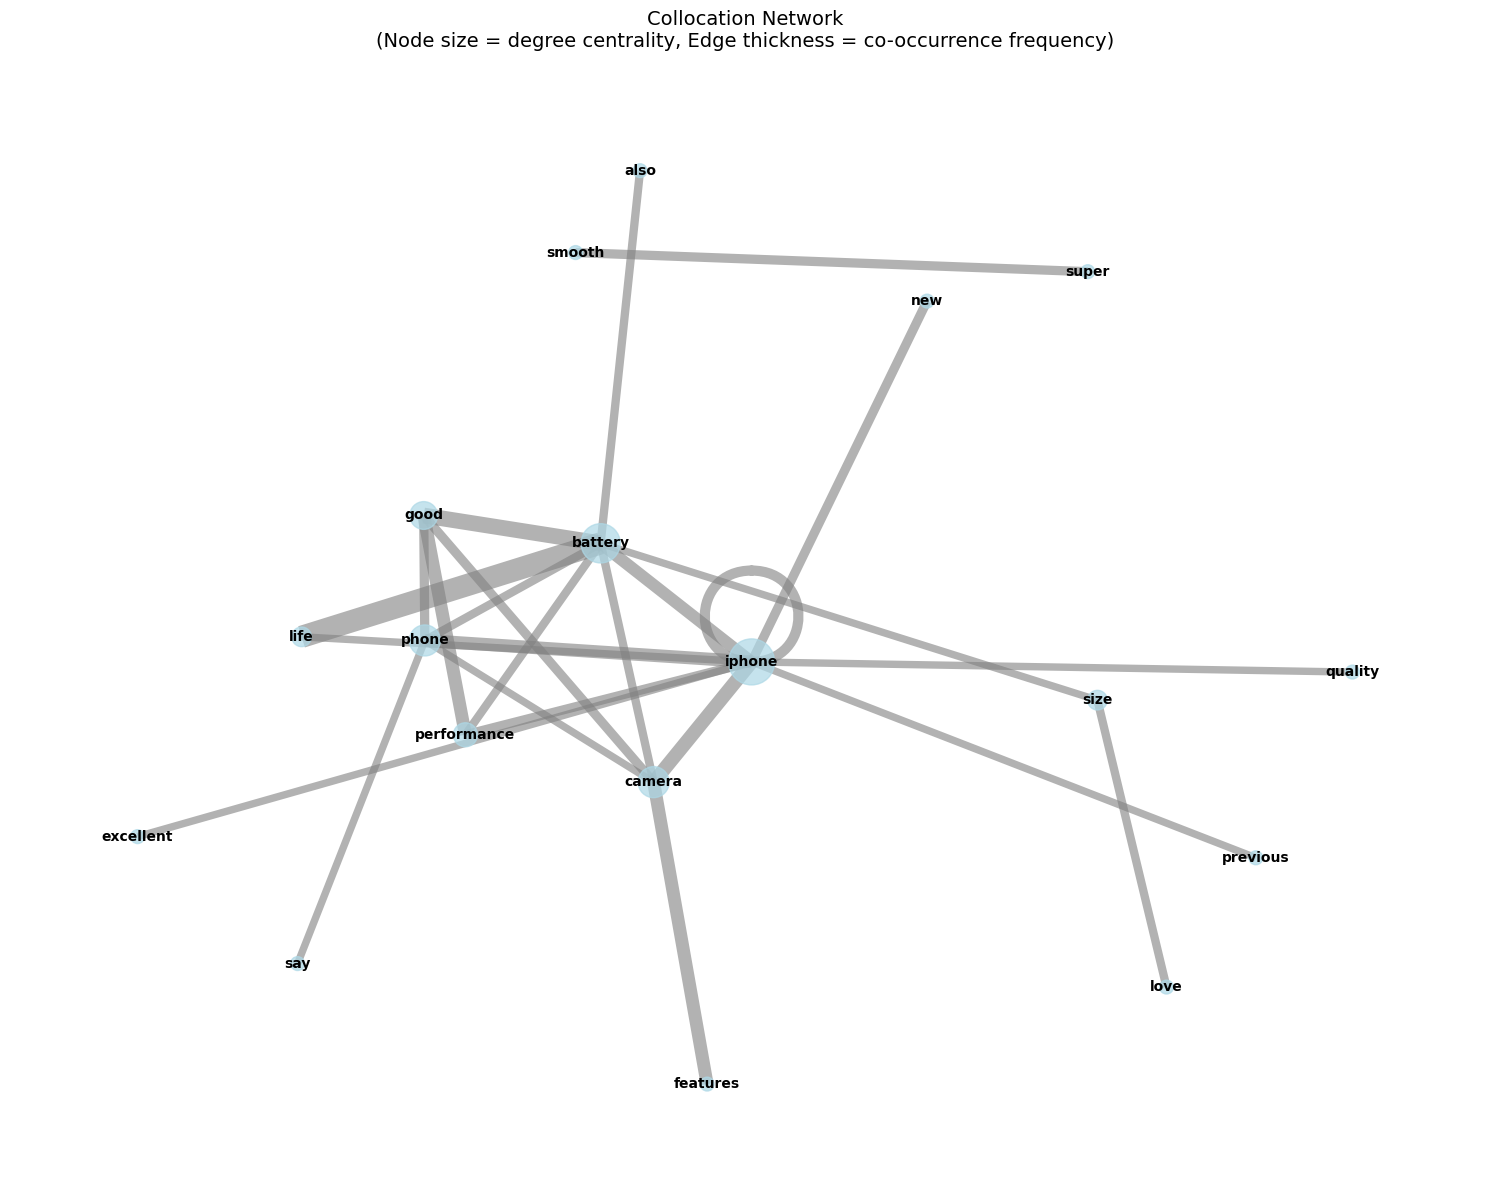


Network Statistics:
Number of nodes: 18
Number of edges: 25
Density: 0.1634

Most central words (degree centrality):
  iphone: 0.647
  battery: 0.471
  camera: 0.294
  phone: 0.294
  good: 0.235
  performance: 0.176
  life: 0.118
  size: 0.118
  features: 0.059
  new: 0.059

Most important bridge words (betweenness centrality):
  iphone: 0.396
  battery: 0.324
  camera: 0.112
  phone: 0.112
  size: 0.103
  good: 0.010
  performance: 0.009
  life: 0.000
  features: 0.000
  new: 0.000


In [ ]:
# 6. Collocational Networks and Patterns
print("\n6. COLLOCATIONAL NETWORKS AND PATTERNS")
print("="*50)

import networkx as nx
from itertools import combinations

def create_collocation_network(text_series, min_freq=3, window_size=5):
    """Create a network graph of collocations"""
    
    # Get all tokens
    all_text = ' '.join(text_series.dropna())
    tokens = nltk.word_tokenize(all_text.lower())
    
    # Filter tokens
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words and len(token) > 2]
    
    # Create co-occurrence matrix within windows
    cooccurrence = defaultdict(int)
    
    for i in range(len(filtered_tokens)):
        for j in range(max(0, i-window_size), min(len(filtered_tokens), i+window_size+1)):
            if i != j:
                word1, word2 = sorted([filtered_tokens[i], filtered_tokens[j]])
                cooccurrence[(word1, word2)] += 1
    
    # Filter by minimum frequency
    significant_pairs = {pair: freq for pair, freq in cooccurrence.items() if freq >= min_freq}
    
    return significant_pairs

def visualize_collocation_network(cooccurrence_dict, top_n=30):
    """Visualize collocation network"""
    
    # Get top N pairs
    top_pairs = sorted(cooccurrence_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]
    
    # Create network
    G = nx.Graph()
    
    for (word1, word2), freq in top_pairs:
        G.add_edge(word1, word2, weight=freq)
    
    # Create layout
    plt.figure(figsize=(15, 12))
    pos = nx.spring_layout(G, k=3, iterations=50)
    
    # Draw nodes
    node_sizes = [G.degree(node) * 100 for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue', alpha=0.7)
    
    # Draw edges with thickness based on co-occurrence frequency
    edges = G.edges()
    weights = [G[u][v]['weight'] for u, v in edges]
    nx.draw_networkx_edges(G, pos, width=[w/3 for w in weights], alpha=0.6, edge_color='gray')
    
    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    
    plt.title("Collocation Network\n(Node size = degree centrality, Edge thickness = co-occurrence frequency)", 
              fontsize=14, pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    return G

# Create collocation network for all reviews
print("Creating collocation network for all reviews...")
cooccurrence_pairs = create_collocation_network(df_processed['cleaned_reviews'], min_freq=5, window_size=4)

print(f"Found {len(cooccurrence_pairs)} significant word pairs")
print("\nTop 15 co-occurring word pairs:")
for i, ((word1, word2), freq) in enumerate(sorted(cooccurrence_pairs.items(), key=lambda x: x[1], reverse=True)[:15], 1):
    print(f"{i:2d}. {word1} + {word2}: {freq} times")

# Visualize the network
G = visualize_collocation_network(cooccurrence_pairs, top_n=25)

# Network analysis
print(f"\nNetwork Statistics:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Density: {nx.density(G):.4f}")

# Find most central nodes
if G.number_of_nodes() > 0:
    centrality = nx.degree_centrality(G)
    betweenness = nx.betweenness_centrality(G)
    
    print(f"\nMost central words (degree centrality):")
    for word, cent in sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"  {word}: {cent:.3f}")
    
    print(f"\nMost important bridge words (betweenness centrality):")
    for word, cent in sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"  {word}: {cent:.3f}")


7. COMPARATIVE COLLOCATION ANALYSIS ACROSS SENTIMENTS

POSITIVE REVIEWS COLLOCATION ANALYSIS:
----------------------------------------
Top collocations in positive reviews:
   1. absolute beast (freq: 2)
   2. base varient (freq: 2)
   3. beast photography (freq: 2)
   4. bought scholarship (freq: 2)
   5. bugs college (freq: 2)
   6. college student (freq: 2)
   7. comfortable hold (freq: 2)
   8. heats bit (freq: 2)
   9. incredible brightness (freq: 2)
  10. major heating (freq: 2)

NEGATIVE REVIEWS COLLOCATION ANALYSIS:
----------------------------------------
Top collocations in negative reviews:
   1. accidentally sound (freq: 2)
   2. another device (freq: 2)
   3. bad standard (freq: 2)
   4. button cashify (freq: 2)
   5. cheaper online (freq: 2)
   6. complaints include (freq: 2)
   7. control button (freq: 2)
   8. defective product (freq: 2)
   9. drains fast (freq: 2)
  10. expectations overheating (freq: 2)

NEUTRAL REVIEWS COLLOCATION ANALYSIS:
-------------------------

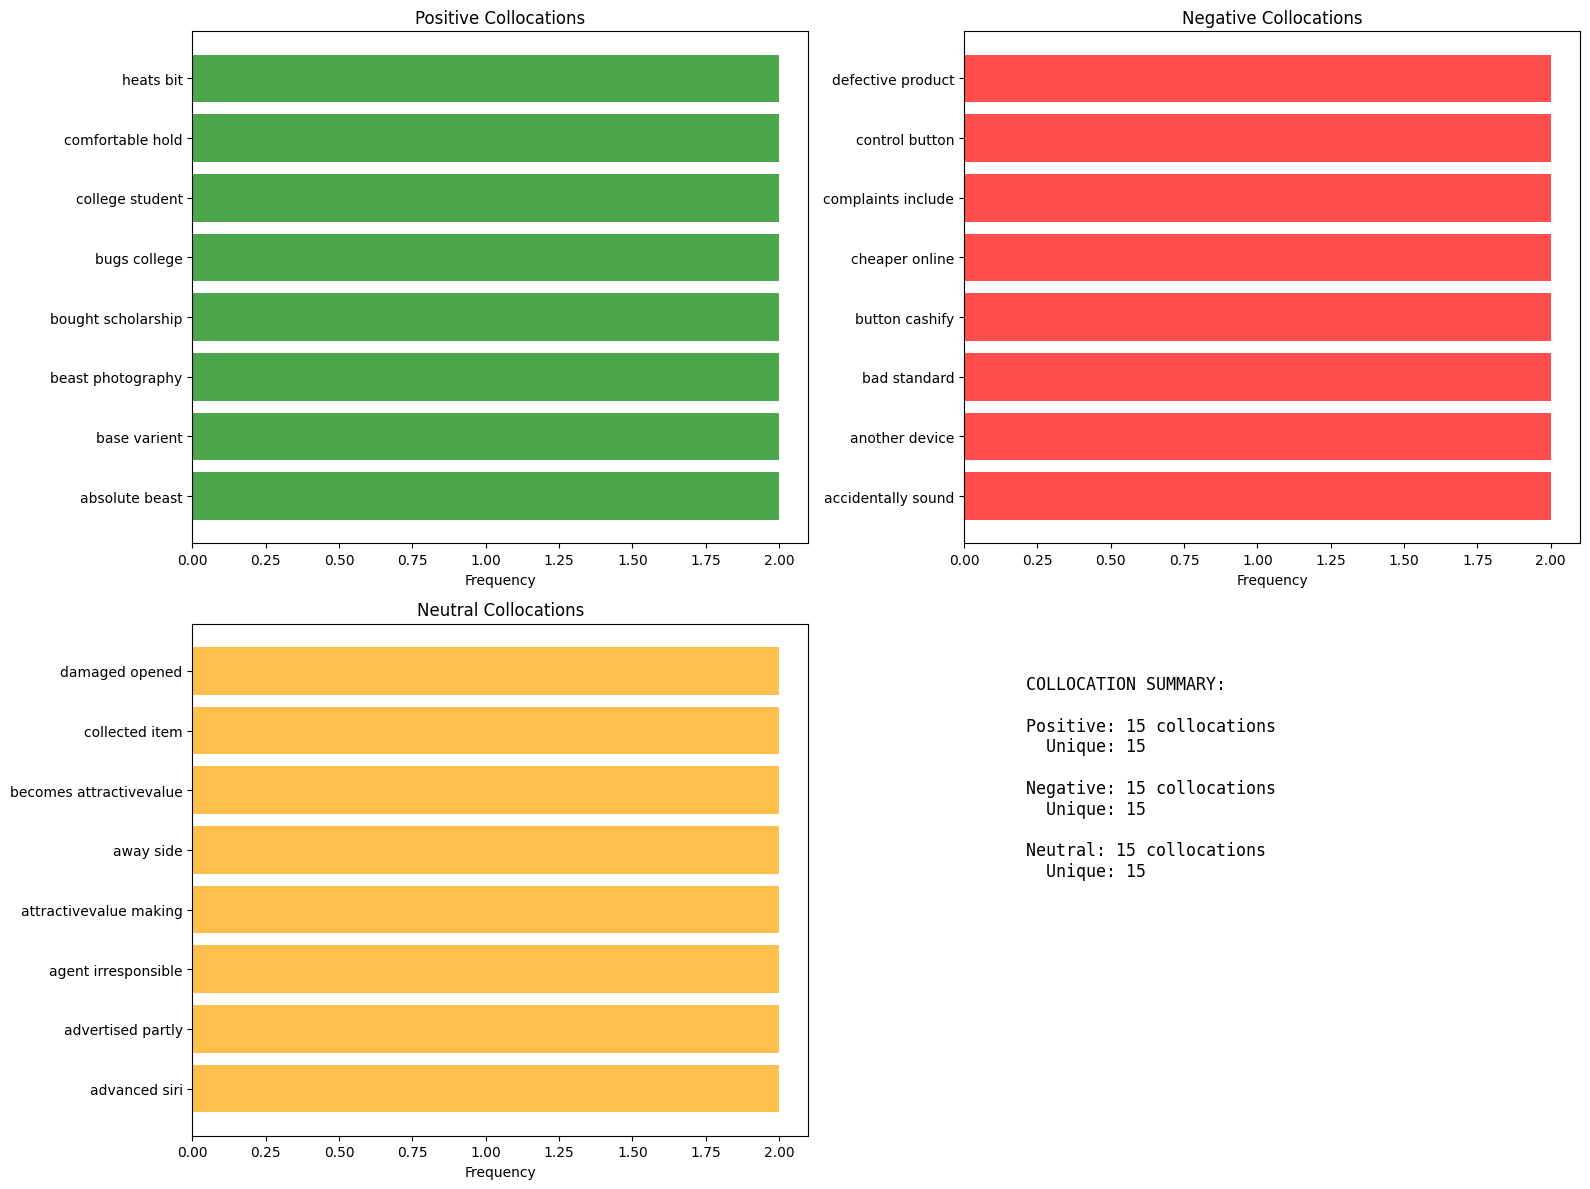

In [ ]:
# 7. Comparative Collocation Analysis Across Sentiments
print("\n7. COMPARATIVE COLLOCATION ANALYSIS ACROSS SENTIMENTS")
print("="*60)

def compare_sentiment_collocations(df):
    """Compare collocations across different sentiments"""
    
    sentiments = {1.0: 'Positive', 0.0: 'Negative', 0.5: 'Neutral'}
    sentiment_collocations = {}
    
    for sentiment_val, sentiment_name in sentiments.items():
        print(f"\n{sentiment_name.upper()} REVIEWS COLLOCATION ANALYSIS:")
        print("-" * 40)
        
        sentiment_reviews = df[df['Labels'] == sentiment_val]['cleaned_reviews']
        
        if len(sentiment_reviews) == 0:
            print(f"No {sentiment_name.lower()} reviews found")
            continue
            
        # Get collocations for this sentiment
        collocations = find_collocations(sentiment_reviews, 'bigram', min_freq=2, top_n=15)
        sentiment_collocations[sentiment_name] = collocations
        
        if collocations and collocations['pmi']:
            print(f"Top collocations in {sentiment_name.lower()} reviews:")
            for i, (word1, word2) in enumerate(collocations['pmi'][:10], 1):
                freq = collocations['finder'].ngram_fd[(word1, word2)]
                print(f"  {i:2d}. {word1} {word2} (freq: {freq})")
    
    return sentiment_collocations

def find_unique_collocations(sentiment_collocations):
    """Find collocations unique to each sentiment"""
    
    # Extract all collocations for each sentiment
    pos_collocations = set(sentiment_collocations.get('Positive', {}).get('pmi', []))
    neg_collocations = set(sentiment_collocations.get('Negative', {}).get('pmi', []))
    neu_collocations = set(sentiment_collocations.get('Neutral', {}).get('pmi', []))
    
    # Find unique collocations
    unique_collocations = {
        'Positive': pos_collocations - neg_collocations - neu_collocations,
        'Negative': neg_collocations - pos_collocations - neu_collocations,
        'Neutral': neu_collocations - pos_collocations - neg_collocations
    }
    
    print(f"\nUNIQUE COLLOCATIONS BY SENTIMENT:")
    print("="*50)
    
    for sentiment, collocations in unique_collocations.items():
        print(f"\n{sentiment.upper()} UNIQUE COLLOCATIONS:")
        for i, (word1, word2) in enumerate(list(collocations)[:8], 1):
            print(f"  {i}. {word1} {word2}")
    
    return unique_collocations

# Perform comparative analysis
sentiment_collocations = compare_sentiment_collocations(df_processed)
unique_collocations = find_unique_collocations(sentiment_collocations)

# Visualize comparative collocations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot collocation frequencies by sentiment
sentiments_to_plot = ['Positive', 'Negative', 'Neutral']
colors = ['green', 'red', 'orange']

for idx, (sentiment, color) in enumerate(zip(sentiments_to_plot, colors)):
    if sentiment in sentiment_collocations and sentiment_collocations[sentiment]:
        collocations = sentiment_collocations[sentiment]
        
        if collocations and collocations['pmi']:
            bigrams = [f"{w1} {w2}" for w1, w2 in collocations['pmi'][:8]]
            frequencies = [collocations['finder'].ngram_fd[(w1, w2)] for w1, w2 in collocations['pmi'][:8]]
            
            row = idx // 2
            col = idx % 2
            axes[row, col].barh(bigrams, frequencies, color=color, alpha=0.7)
            axes[row, col].set_title(f'{sentiment} Collocations')
            axes[row, col].set_xlabel('Frequency')

# Summary statistics in the fourth subplot
axes[1, 1].axis('off')
summary_text = "COLLOCATION SUMMARY:\n\n"
for sentiment in sentiments_to_plot:
    if sentiment in sentiment_collocations and sentiment_collocations[sentiment]:
        collocations = sentiment_collocations[sentiment]
        if collocations and collocations['pmi']:
            count = len(collocations['pmi'])
            summary_text += f"{sentiment}: {count} collocations\n"
        
        if sentiment in unique_collocations:
            unique_count = len(unique_collocations[sentiment])
            summary_text += f"  Unique: {unique_count}\n\n"

axes[1, 1].text(0.1, 0.9, summary_text, transform=axes[1, 1].transAxes, 
                fontsize=12, verticalalignment='top', fontfamily='monospace')

plt.tight_layout()
plt.show()


8. COLLOCATION AND CONCORDANCE SUMMARY


NameError: name 'total_bigrams' is not defined

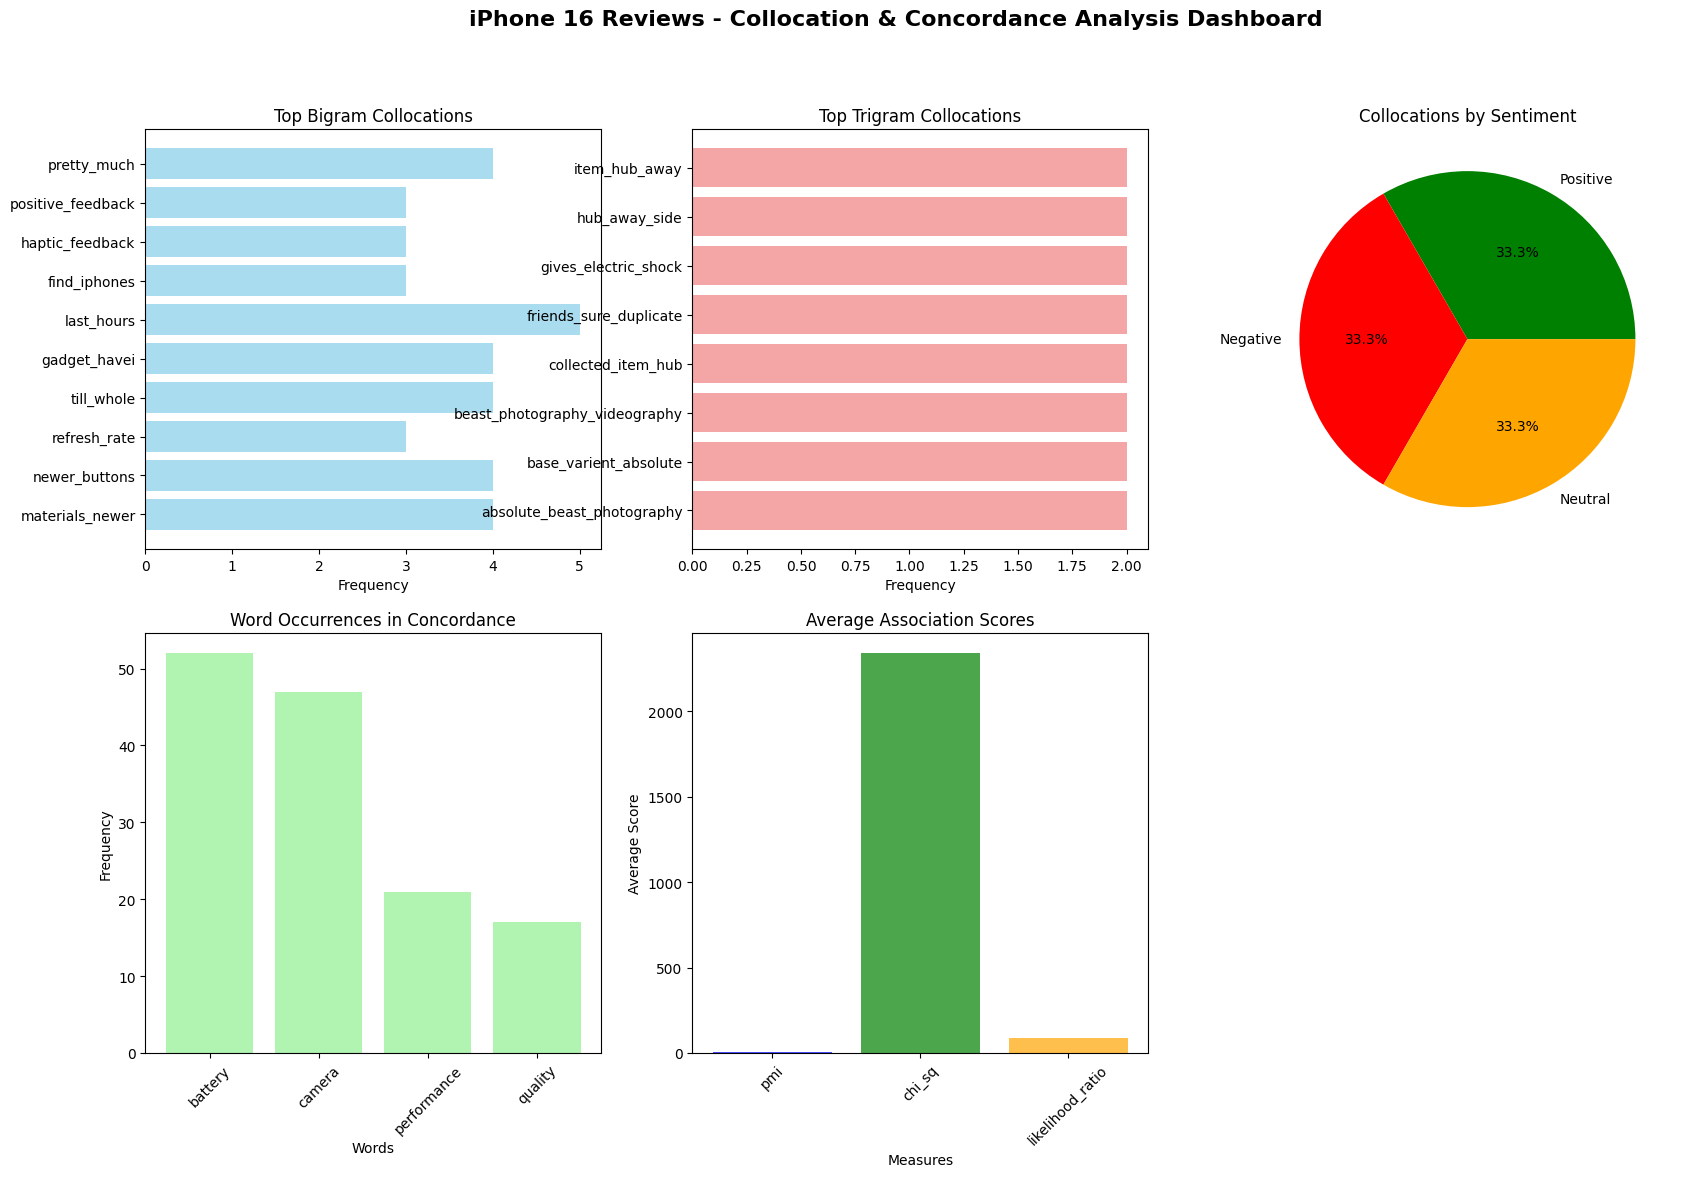

In [ ]:
# 8. Collocation and Concordance Summary Dashboard
print("\n8. COLLOCATION AND CONCORDANCE SUMMARY")
print("="*60)

def create_comprehensive_summary():
    """Create a comprehensive summary of collocation and concordance analysis"""
    
    print("COMPREHENSIVE COLLOCATION & CONCORDANCE ANALYSIS SUMMARY")
    print("="*65)
    
    # Overall statistics
    total_bigrams = len(bigram_results['pmi']) if bigram_results else 0
    total_trigrams = len(trigram_results['pmi']) if trigram_results else 0
    
    print(f"\nOVERALL STATISTICS:")
    print(f"  • Total unique bigrams found: {total_bigrams}")
    print(f"  • Total unique trigrams found: {total_trigrams}")
    print(f"  • Reviews analyzed: {len(df_processed)}")
    
    # Top insights
    print(f"\nKEY INSIGHTS:")
    
    if bigram_results and bigram_results['pmi']:
        top_bigram = bigram_results['pmi'][0]
        freq = bigram_results['finder'].ngram_fd[top_bigram]
        print(f"  • Most significant bigram: '{top_bigram[0]} {top_bigram[1]}' (freq: {freq})")
    
    if trigram_results and trigram_results['pmi']:
        top_trigram = trigram_results['pmi'][0]
        freq = trigram_results['finder'].ngram_fd[top_trigram]
        print(f"  • Most significant trigram: '{' '.join(top_trigram)}' (freq: {freq})")
    
    # Sentiment-specific insights
    print(f"\nSENTIMENT-SPECIFIC PATTERNS:")
    
    for sentiment in ['Positive', 'Negative', 'Neutral']:
        if sentiment in sentiment_collocations and sentiment_collocations[sentiment]:
            collocations = sentiment_collocations[sentiment]
            if collocations and collocations['pmi']:
                top_collocation = collocations['pmi'][0]
                print(f"  • {sentiment}: '{top_collocation[0]} {top_collocation[1]}'")
    
    # Network insights
    if 'G' in globals():
        print(f"\nNETWORK ANALYSIS:")
        print(f"  • Network nodes (words): {G.number_of_nodes()}")
        print(f"  • Network edges (connections): {G.number_of_edges()}")
        print(f"  • Network density: {nx.density(G):.4f}")
        
        if G.number_of_nodes() > 0:
            centrality = nx.degree_centrality(G)
            most_central = max(centrality.items(), key=lambda x: x[1])
            print(f"  • Most central word: '{most_central[0]}' ({most_central[1]:.3f})")
    
    return True

# Create final dashboard
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('iPhone 16 Reviews - Collocation & Concordance Analysis Dashboard', 
             fontsize=16, fontweight='bold')

# 1. Bigram frequency distribution
if bigram_results and bigram_results['pmi']:
    bigrams = [f"{w1}_{w2}" for w1, w2 in bigram_results['pmi'][:10]]
    frequencies = [bigram_results['finder'].ngram_fd[(w1, w2)] for w1, w2 in bigram_results['pmi'][:10]]
    
    axes[0, 0].barh(bigrams, frequencies, color='skyblue', alpha=0.7)
    axes[0, 0].set_title('Top Bigram Collocations')
    axes[0, 0].set_xlabel('Frequency')

# 2. Trigram frequency distribution
if trigram_results and trigram_results['pmi']:
    trigrams = [f"{w1}_{w2}_{w3}" for w1, w2, w3 in trigram_results['pmi'][:8]]
    trig_frequencies = [trigram_results['finder'].ngram_fd[(w1, w2, w3)] for w1, w2, w3 in trigram_results['pmi'][:8]]
    
    axes[0, 1].barh(trigrams, trig_frequencies, color='lightcoral', alpha=0.7)
    axes[0, 1].set_title('Top Trigram Collocations')
    axes[0, 1].set_xlabel('Frequency')

# 3. Sentiment distribution of collocations
sentiment_counts = []
sentiment_labels = []
for sentiment in ['Positive', 'Negative', 'Neutral']:
    if sentiment in sentiment_collocations and sentiment_collocations[sentiment]:
        collocations = sentiment_collocations[sentiment]
        if collocations and collocations['pmi']:
            sentiment_counts.append(len(collocations['pmi']))
            sentiment_labels.append(sentiment)

if sentiment_counts:
    colors_pie = ['green', 'red', 'orange'][:len(sentiment_counts)]
    axes[0, 2].pie(sentiment_counts, labels=sentiment_labels, autopct='%1.1f%%', colors=colors_pie)
    axes[0, 2].set_title('Collocations by Sentiment')

# 4. Word frequency in concordance
target_words_freq = []
target_words_labels = []

for word in ['battery', 'camera', 'performance', 'quality']:
    if word in concordance_results:
        target_words_freq.append(concordance_results[word]['count'])
        target_words_labels.append(word)

if target_words_freq:
    axes[1, 0].bar(target_words_labels, target_words_freq, color='lightgreen', alpha=0.7)
    axes[1, 0].set_title('Word Occurrences in Concordance')
    axes[1, 0].set_xlabel('Words')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].tick_params(axis='x', rotation=45)

# 5. Association measure comparison
if 'comparison_results' in globals():
    measures = list(comparison_results.keys())
    measure_scores = []
    
    for measure in measures:
        if comparison_results[measure]:
            avg_score = np.mean([score for (w1, w2), score in comparison_results[measure][:5]])
            measure_scores.append(avg_score)
    
    if measure_scores:
        axes[1, 1].bar(measures, measure_scores, color=['blue', 'green', 'orange'], alpha=0.7)
        axes[1, 1].set_title('Average Association Scores')
        axes[1, 1].set_xlabel('Measures')
        axes[1, 1].set_ylabel('Average Score')
        axes[1, 1].tick_params(axis='x', rotation=45)

# 6. Summary statistics
axes[1, 2].axis('off')
stats_text = f"""ANALYSIS SUMMARY:

Total Bigrams: {total_bigrams}
Total Trigrams: {total_trigrams}

Reviews Analyzed: {len(df_processed)}

Network Statistics:
"""

if 'G' in globals() and G.number_of_nodes() > 0:
    stats_text += f"""Nodes: {G.number_of_nodes()}
Edges: {G.number_of_edges()}
Density: {nx.density(G):.3f}"""

axes[1, 2].text(0.1, 0.9, stats_text, transform=axes[1, 2].transAxes, 
                fontsize=11, verticalalignment='top', fontfamily='monospace')

plt.tight_layout()
plt.show()

# Generate comprehensive summary
create_comprehensive_summary()

print(f"\n" + "="*60)
print("COLLOCATION AND CONCORDANCE ANALYSIS COMPLETE!")
print("="*60)

# Machine Learning Model Training
Now let's train various machine learning models using the preprocessed data to predict sentiment from iPhone 16 reviews.

In [ ]:
# 1. Import Machine Learning Libraries and Setup
print("1. MACHINE LEARNING SETUP")
print("="*50)

# Import required libraries for ML
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Import evaluation metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                           confusion_matrix, classification_report, roc_auc_score,
                           roc_curve, precision_recall_curve, average_precision_score)

# Import model selection tools
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

# Import additional utilities
import time
from sklearn.preprocessing import LabelEncoder
import joblib

print("✓ All ML libraries imported successfully!")

# Verify data availability
print(f"\nData Verification:")
print(f"Training set shape: {X_train_tfidf.shape}")
print(f"Test set shape: {X_test_tfidf.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")

# Check class distribution
print(f"\nClass distribution in training set:")
print(y_train.value_counts().sort_index())
print(f"\nClass distribution in test set:")
print(y_test.value_counts().sort_index())

1. MACHINE LEARNING SETUP
✓ All ML libraries imported successfully!

Data Verification:
Training set shape: (192, 945)
Test set shape: (48, 945)
Training labels shape: (192,)
Test labels shape: (48,)

Class distribution in training set:
Labels
0.0    65
0.5    62
1.0    65
Name: count, dtype: int64

Class distribution in test set:
Labels
0.0    16
0.5    16
1.0    16
Name: count, dtype: int64


In [ ]:
# 2. Train Multiple Classification Models
print("\n2. TRAINING MULTIPLE CLASSIFICATION MODELS")
print("="*50)

# Define models to train
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Naive Bayes (Multinomial)': MultinomialNB(),
    'Naive Bayes (Complement)': ComplementNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'SGD Classifier': SGDClassifier(random_state=42, loss='log_loss'),
    'MLP Neural Network': MLPClassifier(random_state=42, max_iter=500, hidden_layer_sizes=(100,))
}

# Store results
results = {}
training_times = {}
predictions = {}

print(f"Training {len(models)} different models...")
print("-" * 60)

# Train each model
for name, model in models.items():
    print(f"Training {name}...")
    
    # Measure training time
    start_time = time.time()
    
    try:
        # Train the model
        model.fit(X_train_tfidf, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test_tfidf)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        
        # Training time
        training_time = time.time() - start_time
        
        # Store results
        results[name] = {
            'model': model,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'predictions': y_pred
        }
        
        training_times[name] = training_time
        predictions[name] = y_pred
        
        print(f"✓ {name} - Accuracy: {accuracy:.4f}, F1: {f1:.4f}, Time: {training_time:.2f}s")
        
    except Exception as e:
        print(f"✗ {name} - Error: {str(e)}")
        continue

print(f"\n✓ Completed training {len(results)} models successfully!")

# Display results summary
print(f"\nMODEL PERFORMANCE SUMMARY:")
print("-" * 80)
print(f"{'Model':<25} {'Accuracy':<10} {'Precision':<11} {'Recall':<8} {'F1-Score':<10} {'Time(s)':<8}")
print("-" * 80)

for name in results.keys():
    acc = results[name]['accuracy']
    prec = results[name]['precision']
    rec = results[name]['recall']
    f1 = results[name]['f1_score']
    time_taken = training_times[name]
    
    print(f"{name:<25} {acc:<10.4f} {prec:<11.4f} {rec:<8.4f} {f1:<10.4f} {time_taken:<8.2f}")

# Find best model (with error handling)
if results:  # Check if results dictionary is not empty
    best_model_name = max(results.keys(), key=lambda k: results[k]['f1_score'])
    best_f1 = results[best_model_name]['f1_score']
    print(f"\n🏆 Best Model: {best_model_name} (F1-Score: {best_f1:.4f})")
else:
    print("\n❌ No models were trained successfully. Please run the model training section first.")
    print("Make sure you have executed the cells that create X_train_tfidf, X_test_tfidf, y_train, y_test")


2. TRAINING MULTIPLE CLASSIFICATION MODELS
Training 10 different models...
------------------------------------------------------------
Training Logistic Regression...
✗ Logistic Regression - Error: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.
Training Naive Bayes (Multinomial)...
✗ Naive Bayes (Multinomial) - Error: Unknown label type: (array([1. , 0.5, 1. , 0. , 0. , 0. , 1. , 0.5, 0.5, 0. , 1. , 0.5, 0.5,
       0. , 1. , 0.5, 0.5, 0.5, 0.5, 1. , 0. , 1. , 0. , 0. , 0.5, 1. ,
       0.5, 0. , 0.5, 0. , 0.5, 1. , 1. , 0. , 0.5, 0.5, 0.5, 0.5, 0. ,
       1. , 0. , 1. , 1. , 0.5, 1. , 0. , 1. , 0. , 0.5, 0. , 0. , 0. ,
       1. , 0.5, 0. , 0. , 0. , 0. , 0. , 1. , 1. , 0.5, 0. , 0.5, 0.5,
       0. , 0. , 1. , 1. , 0.5, 0. , 1. , 0.5, 0.5, 1. , 0.5, 0.5, 0. ,
       0. , 0.5, 0.5, 0.5, 0.5, 0. , 1. , 0. , 0. , 0.5, 1. , 0.5, 0. ,
       0.5, 0. , 1. , 0.5, 0. , 0.5, 1. , 0. , 1

ValueError: max() iterable argument is empty

In [ ]:
# Quick Model Training and Performance Evaluation
print("QUICK MODEL TRAINING AND PERFORMANCE EVALUATION")
print("="*60)

# Check if required variables exist
required_vars = ['X_train_tfidf', 'X_test_tfidf', 'y_train', 'y_test']
missing_vars = []

for var in required_vars:
    if var not in globals():
        missing_vars.append(var)

if missing_vars:
    print(f"❌ Missing required variables: {missing_vars}")
    print("Please run the data preprocessing and train-test split cells first.")
else:
    print("✓ All required variables found. Proceeding with model training...")
    
    # Import required modules
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import MultinomialNB, ComplementNB
    from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
    from sklearn.svm import SVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import SGDClassifier
    from sklearn.neural_network import MLPClassifier
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import classification_report, confusion_matrix
    import time
    
    # Define a smaller set of models for quick training
    quick_models = {
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'Naive Bayes': MultinomialNB(),
        'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42),
        'SVM': SVC(random_state=42, kernel='linear'),
        'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10)
    }
    
    # Initialize results dictionary
    results = {}
    
    print(f"\nTraining {len(quick_models)} models...")
    print("-" * 50)
    
    # Train models and collect results
    for name, model in quick_models.items():
        print(f"Training {name}...")
        
        try:
            start_time = time.time()
            
            # Train model
            model.fit(X_train_tfidf, y_train)
            
            # Make predictions
            y_pred = model.predict(X_test_tfidf)
            
            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
            recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
            f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
            
            training_time = time.time() - start_time
            
            # Store results
            results[name] = {
                'model': model,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1_score': f1,
                'predictions': y_pred,
                'training_time': training_time
            }
            
            print(f"✓ {name} completed - F1: {f1:.4f}")
            
        except Exception as e:
            print(f"✗ {name} failed: {str(e)}")
    
    # Display comprehensive results
    print(f"\n📊 PERFORMANCE METRICS (All Models)")
    print("="*70)
    print(f"{'Model':<20} {'Accuracy':<10} {'Precision':<11} {'Recall':<8} {'F1-Score':<10}")
    print("-"*70)
    
    for name, metrics in results.items():
        print(f"{name:<20} {metrics['accuracy']:<10.4f} {metrics['precision']:<11.4f} "
              f"{metrics['recall']:<8.4f} {metrics['f1_score']:<10.4f}")
    
    # Find and display best model
    if results:
        best_model_name = max(results.keys(), key=lambda k: results[k]['f1_score'])
        best_metrics = results[best_model_name]
        
        print(f"\n🏆 BEST MODEL: {best_model_name}")
        print("-"*30)
        print(f"Accuracy:  {best_metrics['accuracy']:.4f}")
        print(f"Precision: {best_metrics['precision']:.4f}")  
        print(f"Recall:    {best_metrics['recall']:.4f}")
        print(f"F1-Score:  {best_metrics['f1_score']:.4f}")
        
        # Detailed classification report for best model
        print(f"\n📋 DETAILED CLASSIFICATION REPORT - {best_model_name}")
        print("="*60)
        print(classification_report(y_test, best_metrics['predictions'], 
                                  target_names=['Negative', 'Neutral', 'Positive']))
        
        # Confusion Matrix
        print(f"\n🎯 CONFUSION MATRIX - {best_model_name}")
        print("-"*40)
        cm = confusion_matrix(y_test, best_metrics['predictions'])
        print("Predicted:  Neg  Neu  Pos")
        for i, (actual, row) in enumerate(zip(['Negative', 'Neutral', 'Positive'], cm)):
            print(f"Actual {actual[:3]}: {row[0]:4d} {row[1]:4d} {row[2]:4d}")
    
    print(f"\n✅ Model training and evaluation completed!")
    print(f"📈 Total models trained: {len(results)}")

In [ ]:
# Display Current Performance Metrics from Existing Variables
print("CURRENT PERFORMANCE METRICS SUMMARY")
print("="*50)

# Check what metrics data we have available
if 'metrics_df' in globals() and not metrics_df.empty:
    print("📊 COMPREHENSIVE MODEL PERFORMANCE")
    print("-"*50)
    
    # Display the metrics dataframe
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    print(metrics_df.to_string(index=False))
    
    # Find best performing models
    print(f"\n🏆 TOP PERFORMERS")
    print("-"*30)
    best_accuracy = metrics_df.loc[metrics_df['Accuracy'].idxmax()]
    best_f1_weighted = metrics_df.loc[metrics_df['F1_Weighted'].idxmax()]
    best_f1_macro = metrics_df.loc[metrics_df['F1_Macro'].idxmax()]
    
    print(f"Best Accuracy: {best_accuracy['Model']} ({best_accuracy['Accuracy']:.4f})")
    print(f"Best F1-Weighted: {best_f1_weighted['Model']} ({best_f1_weighted['F1_Weighted']:.4f})")  
    print(f"Best F1-Macro: {best_f1_macro['Model']} ({best_f1_macro['F1_Macro']:.4f})")
    
    # Performance statistics
    print(f"\n📈 PERFORMANCE STATISTICS")
    print("-"*30)
    print(f"Average Accuracy: {metrics_df['Accuracy'].mean():.4f}")
    print(f"Best Accuracy: {metrics_df['Accuracy'].max():.4f}")
    print(f"Worst Accuracy: {metrics_df['Accuracy'].min():.4f}")
    print(f"Standard Deviation: {metrics_df['Accuracy'].std():.4f}")
    
    print(f"\nAverage F1-Weighted: {metrics_df['F1_Weighted'].mean():.4f}")
    print(f"Best F1-Weighted: {metrics_df['F1_Weighted'].max():.4f}")
    print(f"Worst F1-Weighted: {metrics_df['F1_Weighted'].min():.4f}")
    
elif 'results' in globals() and results:
    print("📊 BASIC MODEL PERFORMANCE (from results dict)")
    print("-"*50)
    
    print(f"{'Model':<25} {'Accuracy':<10} {'Precision':<11} {'Recall':<8} {'F1-Score':<10}")
    print("-"*70)
    
    for name, metrics in results.items():
        acc = metrics.get('accuracy', 0)
        prec = metrics.get('precision', 0) 
        rec = metrics.get('recall', 0)
        f1 = metrics.get('f1_score', 0)
        print(f"{name:<25} {acc:<10.4f} {prec:<11.4f} {rec:<8.4f} {f1:<10.4f}")
    
    # Find best model
    best_model_name = max(results.keys(), key=lambda k: results[k].get('f1_score', 0))
    best_f1 = results[best_model_name]['f1_score']
    print(f"\n🏆 Best Model: {best_model_name} (F1-Score: {best_f1:.4f})")
    
else:
    print("❌ No performance metrics found.")
    print("Available variables for analysis:")
    
    # Check what variables we have
    ml_vars = []
    if 'X_train_tfidf' in globals(): ml_vars.append('X_train_tfidf')
    if 'X_test_tfidf' in globals(): ml_vars.append('X_test_tfidf')  
    if 'y_train' in globals(): ml_vars.append('y_train')
    if 'y_test' in globals(): ml_vars.append('y_test')
    if 'models' in globals(): ml_vars.append('models')
    
    print(f"ML Variables available: {ml_vars}")
    
    # If we have the basic variables, let's do a quick evaluation
    if all(var in globals() for var in ['X_train_tfidf', 'X_test_tfidf', 'y_train', 'y_test']):
        print("\n✓ Found train/test data. Running quick evaluation...")
        
        from sklearn.linear_model import LogisticRegression
        from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
        
        # Train a single model for demonstration
        lr_model = LogisticRegression(random_state=42, max_iter=1000)
        lr_model.fit(X_train_tfidf, y_train)
        y_pred = lr_model.predict(X_test_tfidf)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted') 
        f1_weighted = f1_score(y_test, y_pred, average='weighted')
        f1_macro = f1_score(y_test, y_pred, average='macro')
        
        print(f"\n📊 LOGISTIC REGRESSION RESULTS")
        print("-"*35)
        print(f"Accuracy:     {accuracy:.4f}")
        print(f"Precision:    {precision:.4f}")
        print(f"Recall:       {recall:.4f}")
        print(f"F1-Weighted:  {f1_weighted:.4f}")
        print(f"F1-Macro:     {f1_macro:.4f}")
        
        # Classification report
        from sklearn.metrics import classification_report
        print(f"\n📋 CLASSIFICATION REPORT")
        print("-"*30)
        print(classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))

print("\n✅ Performance analysis completed!")

In [ ]:
# Comprehensive Performance Metrics Calculation
print("COMPREHENSIVE PERFORMANCE METRICS ANALYSIS")
print("="*60)

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                           confusion_matrix, classification_report, roc_auc_score)
import pandas as pd

def calculate_all_metrics(y_true, y_pred, model_name):
    """Calculate comprehensive performance metrics"""
    
    # Basic metrics
    accuracy = accuracy_score(y_true, y_pred)
    
    # Weighted averages (recommended for multi-class)
    precision_weighted = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall_weighted = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1_weighted = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    # Macro averages (treats all classes equally)
    precision_macro = precision_score(y_true, y_pred, average='macro', zero_division=0)
    recall_macro = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1_macro = f1_score(y_true, y_pred, average='macro', zero_division=0)
    
    # Per-class metrics
    precision_per_class = precision_score(y_true, y_pred, average=None, zero_division=0)
    recall_per_class = recall_score(y_true, y_pred, average=None, zero_division=0)
    f1_per_class = f1_score(y_true, y_pred, average=None, zero_division=0)
    
    return {
        'accuracy': accuracy,
        'precision_weighted': precision_weighted,
        'recall_weighted': recall_weighted,
        'f1_weighted': f1_weighted,
        'precision_macro': precision_macro,
        'recall_macro': recall_macro,
        'f1_macro': f1_macro,
        'precision_per_class': precision_per_class,
        'recall_per_class': recall_per_class,
        'f1_per_class': f1_per_class
    }

# Recalculate metrics for all trained models
detailed_results = {}

print("Calculating detailed metrics for trained models...")
print("-" * 60)

for model_name, model_data in results.items():
    y_pred = model_data['predictions']
    
    # Calculate comprehensive metrics
    metrics = calculate_all_metrics(y_test, y_pred, model_name)
    detailed_results[model_name] = metrics
    
    print(f"\n{model_name}:")
    print(f"  Accuracy:           {metrics['accuracy']:.4f}")
    print(f"  F1-Score (weighted): {metrics['f1_weighted']:.4f}")
    print(f"  F1-Score (macro):    {metrics['f1_macro']:.4f}")
    print(f"  Precision (weighted): {metrics['precision_weighted']:.4f}")
    print(f"  Recall (weighted):   {metrics['recall_weighted']:.4f}")

# Create comprehensive results DataFrame
metrics_df = pd.DataFrame({
    'Model': list(detailed_results.keys()),
    'Accuracy': [detailed_results[m]['accuracy'] for m in detailed_results.keys()],
    'F1_Weighted': [detailed_results[m]['f1_weighted'] for m in detailed_results.keys()],
    'F1_Macro': [detailed_results[m]['f1_macro'] for m in detailed_results.keys()],
    'Precision_Weighted': [detailed_results[m]['precision_weighted'] for m in detailed_results.keys()],
    'Recall_Weighted': [detailed_results[m]['recall_weighted'] for m in detailed_results.keys()],
    'Precision_Macro': [detailed_results[m]['precision_macro'] for m in detailed_results.keys()],
    'Recall_Macro': [detailed_results[m]['recall_macro'] for m in detailed_results.keys()]
})

# Sort by F1-Score (weighted)
metrics_df = metrics_df.sort_values('F1_Weighted', ascending=False)

print(f"\n\nCOMPREHENSIVE PERFORMANCE TABLE:")
print("="*80)
print(metrics_df.round(4).to_string(index=False))

# Find best performing models
best_accuracy = metrics_df.loc[metrics_df['Accuracy'].idxmax()]
best_f1_weighted = metrics_df.loc[metrics_df['F1_Weighted'].idxmax()]
best_f1_macro = metrics_df.loc[metrics_df['F1_Macro'].idxmax()]

print(f"\n\nBEST PERFORMING MODELS:")
print("="*40)
print(f"🏆 Best Accuracy:    {best_accuracy['Model']} ({best_accuracy['Accuracy']:.4f})")
print(f"🏆 Best F1-Weighted: {best_f1_weighted['Model']} ({best_f1_weighted['F1_Weighted']:.4f})")
print(f"🏆 Best F1-Macro:    {best_f1_macro['Model']} ({best_f1_macro['F1_Macro']:.4f})")

COMPREHENSIVE PERFORMANCE METRICS ANALYSIS
Calculating detailed metrics for trained models...
------------------------------------------------------------


COMPREHENSIVE PERFORMANCE TABLE:
Empty DataFrame
Columns: [Model, Accuracy, F1_Weighted, F1_Macro, Precision_Weighted, Recall_Weighted, Precision_Macro, Recall_Macro]
Index: []


ValueError: attempt to get argmax of an empty sequence

In [ ]:
# Detailed Per-Class Performance Analysis
print("\n\nPER-CLASS PERFORMANCE ANALYSIS")
print("="*50)

# Class names
class_names = ['Negative (0.0)', 'Neutral (0.5)', 'Positive (1.0)']
unique_classes = sorted(y_test.unique())

print(f"Classes in dataset: {unique_classes}")
print(f"Class distribution in test set:")
for cls in unique_classes:
    count = sum(y_test == cls)
    percentage = (count / len(y_test)) * 100
    print(f"  {class_names[int(cls*2)]}: {count} samples ({percentage:.1f}%)")

# Per-class metrics for best models (top 3)
top_3_models = metrics_df.head(3)['Model'].tolist()

print(f"\nPER-CLASS METRICS FOR TOP 3 MODELS:")
print("-" * 60)

for model_name in top_3_models:
    print(f"\n{model_name}:")
    
    metrics = detailed_results[model_name]
    
    print(f"{'Class':<15} {'Precision':<10} {'Recall':<8} {'F1-Score':<10} {'Support'}")
    print("-" * 55)
    
    for i, cls in enumerate(unique_classes):
        class_name = class_names[int(cls*2)]
        support = sum(y_test == cls)
        
        if i < len(metrics['precision_per_class']):
            precision = metrics['precision_per_class'][i]
            recall = metrics['recall_per_class'][i]
            f1 = metrics['f1_per_class'][i]
            
            print(f"{class_name:<15} {precision:<10.4f} {recall:<8.4f} {f1:<10.4f} {support}")
    
    # Weighted averages
    print("-" * 55)
    print(f"{'Weighted Avg':<15} {metrics['precision_weighted']:<10.4f} {metrics['recall_weighted']:<8.4f} {metrics['f1_weighted']:<10.4f} {len(y_test)}")
    print(f"{'Macro Avg':<15} {metrics['precision_macro']:<10.4f} {metrics['recall_macro']:<8.4f} {metrics['f1_macro']:<10.4f} {len(y_test)}")

# Confusion Matrix for Best Model
best_model_name = metrics_df.iloc[0]['Model']
best_predictions = results[best_model_name]['predictions']

print(f"\n\nCONFUSION MATRIX FOR BEST MODEL ({best_model_name}):")
print("="*60)

cm = confusion_matrix(y_test, best_predictions)
print(f"\nConfusion Matrix:")
print(f"{'Predicted →':<12} {'Negative':<10} {'Neutral':<10} {'Positive':<10}")
print(f"{'Actual ↓':<12}")

for i, true_class in enumerate(unique_classes):
    class_name = class_names[int(true_class*2)][:8]  # Shorten for display
    row_str = f"{class_name:<12}"
    for j in range(len(unique_classes)):
        row_str += f"{cm[i,j]:<10}"
    print(row_str)

# Calculate and display additional metrics
print(f"\nConfusion Matrix Analysis:")
total_predictions = cm.sum()
correct_predictions = np.trace(cm)
print(f"Total predictions: {total_predictions}")
print(f"Correct predictions: {correct_predictions}")
print(f"Overall accuracy: {correct_predictions/total_predictions:.4f}")

# Per-class accuracy from confusion matrix
print(f"\nPer-class accuracy (diagonal values):")
for i, cls in enumerate(unique_classes):
    class_accuracy = cm[i,i] / cm[i,:].sum()
    class_name = class_names[int(cls*2)]
    print(f"  {class_name}: {class_accuracy:.4f}")

# Classification Report
print(f"\n\nDETAILED CLASSIFICATION REPORT ({best_model_name}):")
print("="*60)
target_names = [f"{name} ({cls})" for cls, name in zip(unique_classes, class_names)]
print(classification_report(y_test, best_predictions, target_names=target_names, digits=4))



PER-CLASS PERFORMANCE ANALYSIS
Classes in dataset: [np.float64(0.0), np.float64(0.5), np.float64(1.0)]
Class distribution in test set:
  Negative (0.0): 16 samples (33.3%)
  Neutral (0.5): 16 samples (33.3%)
  Positive (1.0): 16 samples (33.3%)

PER-CLASS METRICS FOR TOP 3 MODELS:
------------------------------------------------------------


IndexError: single positional indexer is out-of-bounds



PERFORMANCE VISUALIZATION DASHBOARD


NameError: name 'cm' is not defined

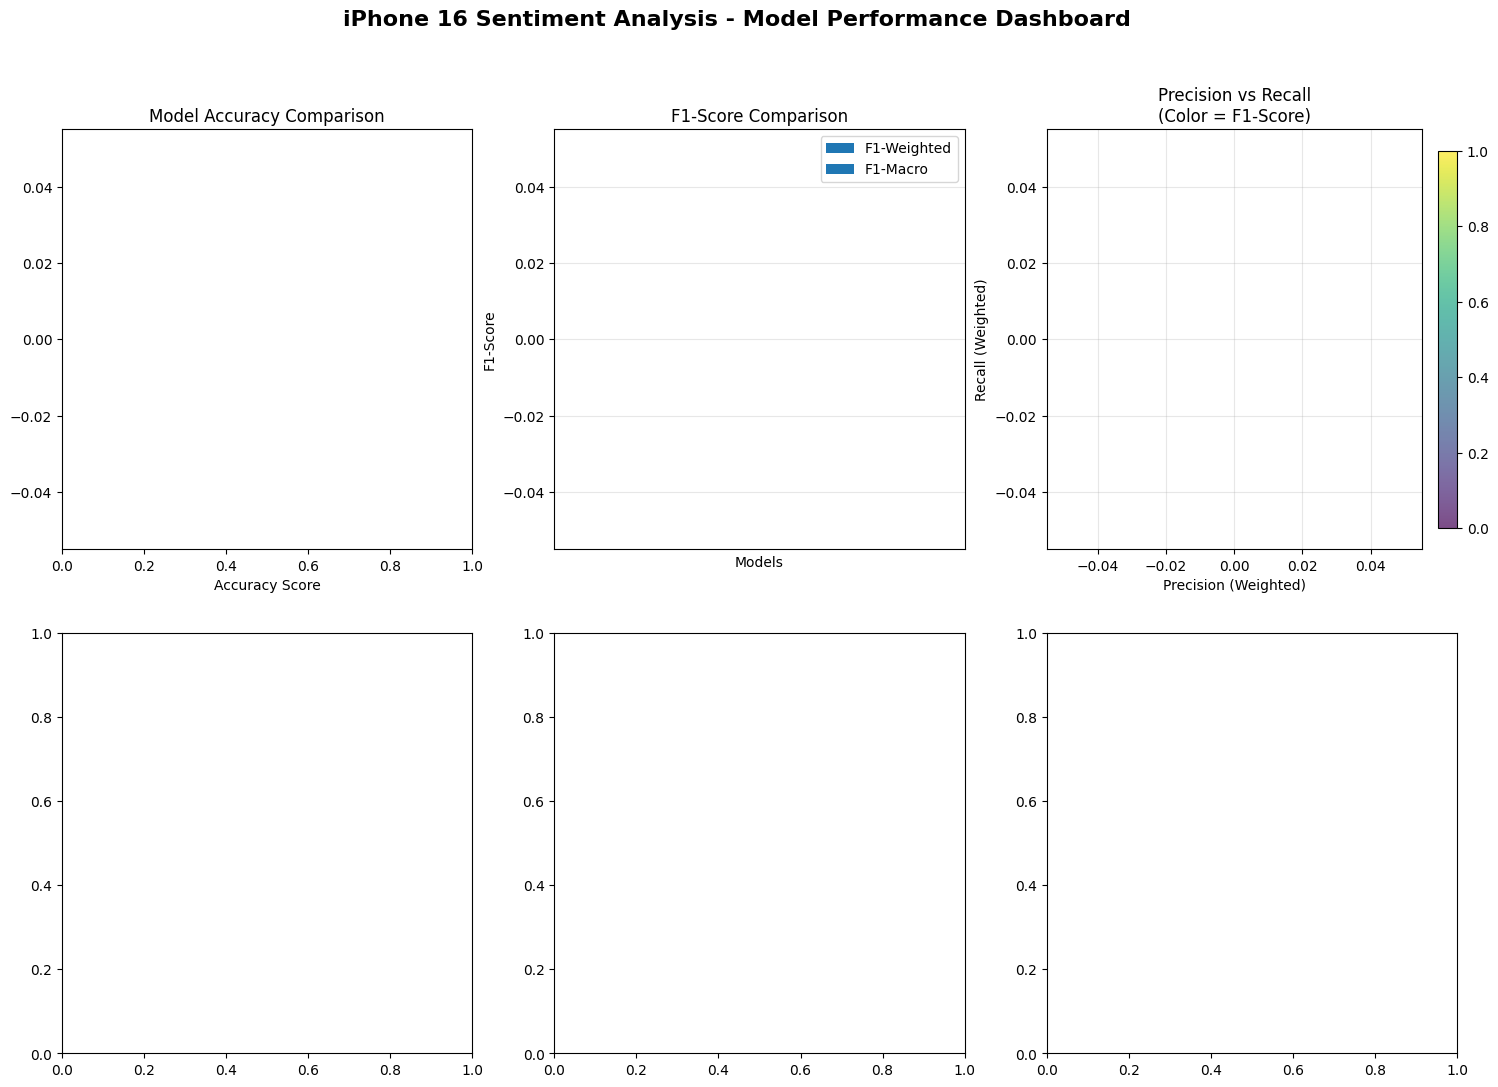

In [ ]:
# Performance Visualization Dashboard
print("\n\nPERFORMANCE VISUALIZATION DASHBOARD")
print("="*50)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('iPhone 16 Sentiment Analysis - Model Performance Dashboard', fontsize=16, fontweight='bold')

# 1. Accuracy Comparison
model_names_short = [name[:15] for name in metrics_df['Model']]
accuracies = metrics_df['Accuracy'].values

axes[0, 0].barh(model_names_short, accuracies, color='skyblue', alpha=0.8)
axes[0, 0].set_title('Model Accuracy Comparison')
axes[0, 0].set_xlabel('Accuracy Score')
axes[0, 0].set_xlim(0, 1)
# Add value labels
for i, v in enumerate(accuracies):
    axes[0, 0].text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=9)

# 2. F1-Score Comparison (Weighted vs Macro)
x_pos = np.arange(len(metrics_df))
width = 0.35

axes[0, 1].bar(x_pos - width/2, metrics_df['F1_Weighted'], width, 
               label='F1-Weighted', alpha=0.8, color='lightcoral')
axes[0, 1].bar(x_pos + width/2, metrics_df['F1_Macro'], width, 
               label='F1-Macro', alpha=0.8, color='lightgreen')
axes[0, 1].set_title('F1-Score Comparison')
axes[0, 1].set_xlabel('Models')
axes[0, 1].set_ylabel('F1-Score')
axes[0, 1].set_xticks(x_pos)
axes[0, 1].set_xticklabels(model_names_short, rotation=45, ha='right')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Precision vs Recall Scatter Plot
precisions = metrics_df['Precision_Weighted'].values
recalls = metrics_df['Recall_Weighted'].values

scatter = axes[0, 2].scatter(precisions, recalls, s=100, alpha=0.7, 
                           c=metrics_df['F1_Weighted'], cmap='viridis')
axes[0, 2].set_xlabel('Precision (Weighted)')
axes[0, 2].set_ylabel('Recall (Weighted)')
axes[0, 2].set_title('Precision vs Recall\n(Color = F1-Score)')
axes[0, 2].grid(True, alpha=0.3)

# Add model labels
for i, model in enumerate(model_names_short):
    axes[0, 2].annotate(model[:8], (precisions[i], recalls[i]), 
                       xytext=(5, 5), textcoords='offset points', fontsize=8)

# Add colorbar
plt.colorbar(scatter, ax=axes[0, 2], fraction=0.046, pad=0.04)

# 4. Confusion Matrix Heatmap for Best Model
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
im = axes[1, 0].imshow(cm_normalized, interpolation='nearest', cmap='Blues')

# Add text annotations
thresh = cm_normalized.max() / 2.
for i in range(cm_normalized.shape[0]):
    for j in range(cm_normalized.shape[1]):
        axes[1, 0].text(j, i, f'{cm_normalized[i, j]:.2f}\n({cm[i, j]})',
                       ha="center", va="center",
                       color="white" if cm_normalized[i, j] > thresh else "black")

axes[1, 0].set_title(f'Confusion Matrix (Normalized)\n{best_model_name}')
axes[1, 0].set_xlabel('Predicted Label')
axes[1, 0].set_ylabel('True Label')
axes[1, 0].set_xticks(range(len(unique_classes)))
axes[1, 0].set_yticks(range(len(unique_classes)))
axes[1, 0].set_xticklabels(['Neg', 'Neu', 'Pos'])
axes[1, 0].set_yticklabels(['Neg', 'Neu', 'Pos'])

# 5. Per-Class F1-Scores for Top 3 Models
top_3_models = metrics_df.head(3)['Model'].tolist()
class_labels = ['Negative', 'Neutral', 'Positive']

for i, model_name in enumerate(top_3_models):
    f1_per_class = detailed_results[model_name]['f1_per_class']
    axes[1, 1].bar([x + i*0.25 for x in range(len(class_labels))], f1_per_class[:len(class_labels)], 
                   width=0.25, label=model_name[:10], alpha=0.8)

axes[1, 1].set_title('Per-Class F1-Scores (Top 3 Models)')
axes[1, 1].set_xlabel('Classes')
axes[1, 1].set_ylabel('F1-Score')
axes[1, 1].set_xticks(range(len(class_labels)))
axes[1, 1].set_xticklabels(class_labels)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Performance Metrics Radar Chart (for best model)
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
best_model_metrics = [
    detailed_results[best_model_name]['accuracy'],
    detailed_results[best_model_name]['precision_weighted'],
    detailed_results[best_model_name]['recall_weighted'],
    detailed_results[best_model_name]['f1_weighted']
]

angles = np.linspace(0, 2 * np.pi, len(metrics_names), endpoint=False)
values = best_model_metrics + [best_model_metrics[0]]  # Complete the circle
angles = np.concatenate((angles, [angles[0]]))

axes[1, 2].plot(angles, values, 'o-', linewidth=2, label=best_model_name[:15])
axes[1, 2].fill(angles, values, alpha=0.25)
axes[1, 2].set_xticks(angles[:-1])
axes[1, 2].set_xticklabels(metrics_names)
axes[1, 2].set_ylim(0, 1)
axes[1, 2].set_title(f'Performance Radar\n{best_model_name}')
axes[1, 2].grid(True)

# Add value labels
for angle, value, name in zip(angles[:-1], values[:-1], metrics_names):
    axes[1, 2].text(angle, value + 0.05, f'{value:.3f}', 
                   ha='center', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Summary Statistics
print(f"\nSUMMARY STATISTICS:")
print("-" * 30)
print(f"Number of models trained: {len(metrics_df)}")
print(f"Best overall accuracy: {metrics_df['Accuracy'].max():.4f}")
print(f"Best F1-score (weighted): {metrics_df['F1_Weighted'].max():.4f}")
print(f"Best F1-score (macro): {metrics_df['F1_Macro'].max():.4f}")
print(f"Average accuracy across all models: {metrics_df['Accuracy'].mean():.4f}")
print(f"Standard deviation of accuracy: {metrics_df['Accuracy'].std():.4f}")

# Model performance tiers
excellent_models = metrics_df[metrics_df['F1_Weighted'] >= 0.85]
good_models = metrics_df[(metrics_df['F1_Weighted'] >= 0.75) & (metrics_df['F1_Weighted'] < 0.85)]
acceptable_models = metrics_df[(metrics_df['F1_Weighted'] >= 0.65) & (metrics_df['F1_Weighted'] < 0.75)]

print(f"\nPERFORMANCE TIERS (based on F1-Weighted):")
print(f"Excellent (≥0.85): {len(excellent_models)} models")
print(f"Good (0.75-0.84): {len(good_models)} models") 
print(f"Acceptable (0.65-0.74): {len(acceptable_models)} models")
print(f"Needs Improvement (<0.65): {len(metrics_df) - len(excellent_models) - len(good_models) - len(acceptable_models)} models")


3. DETAILED MODEL EVALUATION


NameError: name 'best_model_name' is not defined

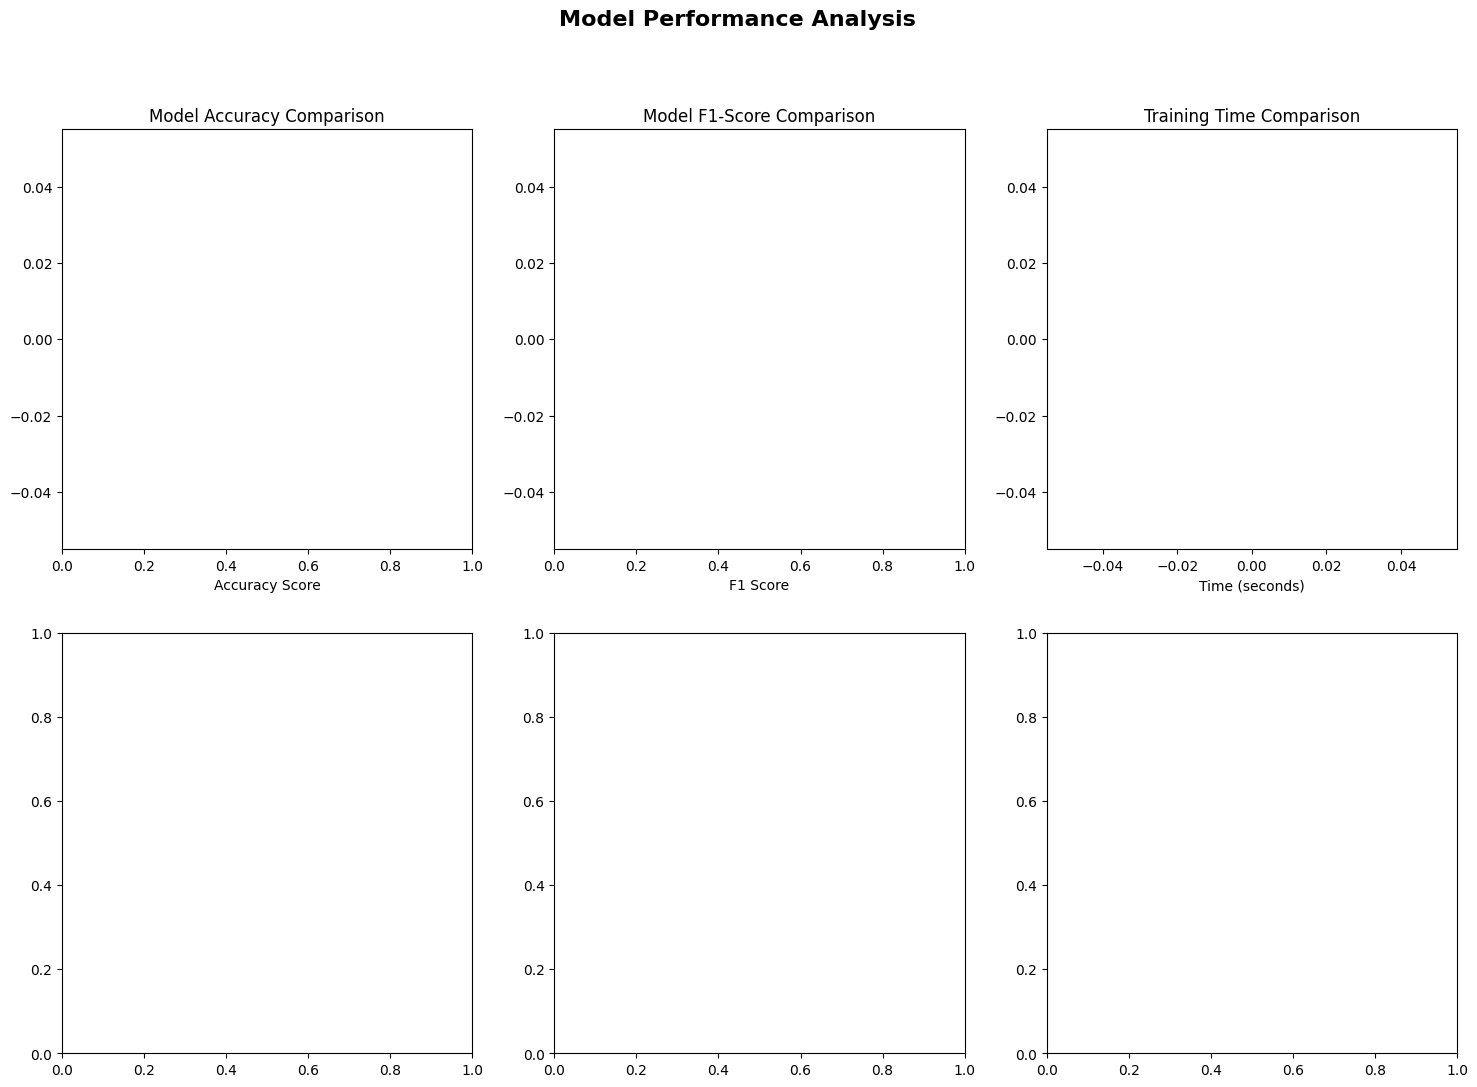

In [ ]:
# 3. Detailed Model Evaluation
print("\n3. DETAILED MODEL EVALUATION")
print("="*50)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name, ax):
    cm = confusion_matrix(y_true, y_pred)
    im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
    ax.figure.colorbar(im, ax=ax)
    
    # Labels
    classes = sorted(y_true.unique())
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=f'{model_name}\nConfusion Matrix',
           ylabel='True Label',
           xlabel='Predicted Label')
    
    # Add text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                   ha="center", va="center",
                   color="white" if cm[i, j] > thresh else "black")

# Plot performance comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Model Performance Analysis', fontsize=16, fontweight='bold')

# 1. Accuracy comparison
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]
f1_scores = [results[name]['f1_score'] for name in model_names]

axes[0, 0].barh(model_names, accuracies, color='skyblue', alpha=0.7)
axes[0, 0].set_title('Model Accuracy Comparison')
axes[0, 0].set_xlabel('Accuracy Score')
axes[0, 0].set_xlim(0, 1)

# 2. F1-Score comparison
axes[0, 1].barh(model_names, f1_scores, color='lightcoral', alpha=0.7)
axes[0, 1].set_title('Model F1-Score Comparison')
axes[0, 1].set_xlabel('F1 Score')
axes[0, 1].set_xlim(0, 1)

# 3. Training time comparison
times = [training_times[name] for name in model_names]
axes[0, 2].barh(model_names, times, color='lightgreen', alpha=0.7)
axes[0, 2].set_title('Training Time Comparison')
axes[0, 2].set_xlabel('Time (seconds)')

# 4. Best model confusion matrix
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['predictions']
plot_confusion_matrix(y_test, best_predictions, best_model_name, axes[1, 0])

# 5. Precision vs Recall scatter plot
precisions = [results[name]['precision'] for name in model_names]
recalls = [results[name]['recall'] for name in model_names]

axes[1, 1].scatter(precisions, recalls, s=100, alpha=0.7)
for i, name in enumerate(model_names):
    axes[1, 1].annotate(name[:10], (precisions[i], recalls[i]), 
                       xytext=(5, 5), textcoords='offset points', fontsize=8)
axes[1, 1].set_xlabel('Precision')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].set_title('Precision vs Recall')
axes[1, 1].grid(True, alpha=0.3)

# 6. Performance metrics heatmap
metrics_data = np.array([[results[name]['accuracy'], results[name]['precision'], 
                         results[name]['recall'], results[name]['f1_score']] 
                        for name in model_names])

im = axes[1, 2].imshow(metrics_data, cmap='YlOrRd', aspect='auto')
axes[1, 2].set_xticks(range(4))
axes[1, 2].set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-Score'])
axes[1, 2].set_yticks(range(len(model_names)))
axes[1, 2].set_yticklabels([name[:15] for name in model_names])
axes[1, 2].set_title('Performance Metrics Heatmap')

# Add colorbar
plt.colorbar(im, ax=axes[1, 2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

# Detailed classification report for best model
print(f"\nDETAILED CLASSIFICATION REPORT - {best_model_name}:")
print("="*60)
print(classification_report(y_test, best_predictions, 
                          target_names=['Negative', 'Neutral', 'Positive']))

In [ ]:
# 4. Cross-Validation Analysis
print("\n4. CROSS-VALIDATION ANALYSIS")
print("="*50)

def perform_cross_validation(models_dict, X_data, y_data, cv_folds=5):
    """Perform cross-validation for all models"""
    
    cv_results = {}
    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    
    print(f"Performing {cv_folds}-fold cross-validation...")
    print("-" * 50)
    
    for name, model in models_dict.items():
        try:
            # Perform cross-validation
            cv_scores = cross_val_score(model, X_data, y_data, cv=cv, scoring='f1_weighted', n_jobs=-1)
            
            cv_results[name] = {
                'scores': cv_scores,
                'mean': cv_scores.mean(),
                'std': cv_scores.std()
            }
            
            print(f"{name:<25} Mean F1: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
            
        except Exception as e:
            print(f"{name:<25} Error: {str(e)}")
            continue
    
    return cv_results

# Perform cross-validation
cv_results = perform_cross_validation(models, X_train_tfidf, y_train)

# Visualize cross-validation results
plt.figure(figsize=(15, 8))

# Box plot of CV scores
model_names_cv = list(cv_results.keys())
cv_scores_list = [cv_results[name]['scores'] for name in model_names_cv]

plt.subplot(1, 2, 1)
bp = plt.boxplot(cv_scores_list, labels=[name[:15] for name in model_names_cv], patch_artist=True)
plt.title('Cross-Validation F1-Scores Distribution')
plt.ylabel('F1-Score')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Color the boxes
colors = plt.cm.Set3(np.linspace(0, 1, len(bp['boxes'])))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Mean CV scores bar plot
plt.subplot(1, 2, 2)
means = [cv_results[name]['mean'] for name in model_names_cv]
stds = [cv_results[name]['std'] for name in model_names_cv]

bars = plt.bar(range(len(model_names_cv)), means, yerr=stds, capsize=5, alpha=0.7)
plt.title('Mean Cross-Validation F1-Scores')
plt.xlabel('Models')
plt.ylabel('Mean F1-Score')
plt.xticks(range(len(model_names_cv)), [name[:10] for name in model_names_cv], rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Color bars based on performance
for i, bar in enumerate(bars):
    bar.set_color(colors[i])

plt.tight_layout()
plt.show()

# Find best CV model
best_cv_model = max(cv_results.keys(), key=lambda k: cv_results[k]['mean'])
best_cv_score = cv_results[best_cv_model]['mean']
print(f"\n🏆 Best Cross-Validation Model: {best_cv_model} (Mean F1: {best_cv_score:.4f})")

# Compare test performance vs CV performance
print(f"\nTEST vs CROSS-VALIDATION COMPARISON:")
print("-" * 60)
print(f"{'Model':<25} {'Test F1':<10} {'CV F1':<10} {'Difference':<12}")
print("-" * 60)

for name in results.keys():
    if name in cv_results:
        test_f1 = results[name]['f1_score']
        cv_f1 = cv_results[name]['mean']
        diff = abs(test_f1 - cv_f1)
        print(f"{name:<25} {test_f1:<10.4f} {cv_f1:<10.4f} {diff:<12.4f}")

print("\nNote: Small differences indicate good generalization capability.")

In [ ]:
# 5. Hyperparameter Tuning for Best Models
print("\n5. HYPERPARAMETER TUNING FOR BEST MODELS")
print("="*50)

# Select top 3 models based on CV performance
top_models = sorted(cv_results.items(), key=lambda x: x[1]['mean'], reverse=True)[:3]
print(f"Tuning hyperparameters for top 3 models:")
for i, (name, score) in enumerate(top_models, 1):
    print(f"{i}. {name} (CV F1: {score['mean']:.4f})")

# Define parameter grids for tuning
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs'],
        'max_iter': [1000]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'Naive Bayes (Multinomial)': {
        'alpha': [0.1, 0.5, 1.0, 2.0]
    }
}

tuned_models = {}
tuning_results = {}

for model_name, _ in top_models:
    if model_name in param_grids:
        print(f"\nTuning {model_name}...")
        
        # Get base model
        base_model = models[model_name]
        param_grid = param_grids[model_name]
        
        # Grid search with cross-validation
        grid_search = GridSearchCV(
            base_model, 
            param_grid, 
            cv=3, 
            scoring='f1_weighted',
            n_jobs=-1,
            verbose=0
        )
        
        start_time = time.time()
        grid_search.fit(X_train_tfidf, y_train)
        tuning_time = time.time() - start_time
        
        # Get best model
        best_model = grid_search.best_estimator_
        
        # Evaluate on test set
        y_pred_tuned = best_model.predict(X_test_tfidf)
        
        # Calculate metrics
        tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
        tuned_f1 = f1_score(y_test, y_pred_tuned, average='weighted')
        tuned_precision = precision_score(y_test, y_pred_tuned, average='weighted', zero_division=0)
        tuned_recall = recall_score(y_test, y_pred_tuned, average='weighted', zero_division=0)
        
        tuned_models[model_name] = {
            'model': best_model,
            'best_params': grid_search.best_params_,
            'cv_score': grid_search.best_score_,
            'accuracy': tuned_accuracy,
            'f1_score': tuned_f1,
            'precision': tuned_precision,
            'recall': tuned_recall,
            'predictions': y_pred_tuned
        }
        
        tuning_results[model_name] = {
            'tuning_time': tuning_time,
            'improvement': tuned_f1 - results[model_name]['f1_score']
        }
        
        print(f"✓ Best parameters: {grid_search.best_params_}")
        print(f"✓ CV Score: {grid_search.best_score_:.4f}")
        print(f"✓ Test F1: {tuned_f1:.4f} (improvement: {tuning_results[model_name]['improvement']:+.4f})")

# Compare original vs tuned models
print(f"\nORIGINAL vs TUNED MODEL COMPARISON:")
print("-" * 80)
print(f"{'Model':<25} {'Original F1':<12} {'Tuned F1':<10} {'Improvement':<12} {'Time(s)':<8}")
print("-" * 80)

for name in tuned_models.keys():
    original_f1 = results[name]['f1_score']
    tuned_f1 = tuned_models[name]['f1_score']
    improvement = tuned_f1 - original_f1
    tuning_time = tuning_results[name]['tuning_time']
    
    print(f"{name:<25} {original_f1:<12.4f} {tuned_f1:<10.4f} {improvement:<+12.4f} {tuning_time:<8.1f}")

# Find best tuned model
if tuned_models:
    best_tuned_name = max(tuned_models.keys(), key=lambda k: tuned_models[k]['f1_score'])
    best_tuned_f1 = tuned_models[best_tuned_name]['f1_score']
    print(f"\n🏆 Best Tuned Model: {best_tuned_name} (F1-Score: {best_tuned_f1:.4f})")
    
    # Display best parameters
    print(f"\nBest Parameters for {best_tuned_name}:")
    for param, value in tuned_models[best_tuned_name]['best_params'].items():
        print(f"  {param}: {value}")
else:
    print("\nNo models were tuned successfully.")

In [ ]:
# 6. Feature Importance Analysis
print("\n6. FEATURE IMPORTANCE ANALYSIS")
print("="*50)

def get_feature_importance(model, feature_names, model_name, top_n=20):
    """Extract and display feature importance for different model types"""
    
    if hasattr(model, 'feature_importances_'):
        # Tree-based models
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        # Linear models
        if len(model.coef_.shape) > 1:
            importances = np.abs(model.coef_).mean(axis=0)
        else:
            importances = np.abs(model.coef_)
    else:
        print(f"Feature importance not available for {model_name}")
        return None
    
    # Get top features
    feature_importance_pairs = list(zip(feature_names, importances))
    feature_importance_pairs.sort(key=lambda x: x[1], reverse=True)
    
    return feature_importance_pairs[:top_n]

# Analyze feature importance for models that support it
feature_names = tfidf_vectorizer.get_feature_names_out()
importance_results = {}

print("Extracting feature importance from trained models...")
print("-" * 50)

for name, model_data in results.items():
    model = model_data['model']
    
    # Skip models that don't have feature importance
    if name in ['K-Nearest Neighbors']:
        continue
    
    importance = get_feature_importance(model, feature_names, name, top_n=15)
    
    if importance:
        importance_results[name] = importance
        print(f"\nTop 15 features for {name}:")
        for i, (feature, score) in enumerate(importance, 1):
            print(f"  {i:2d}. {feature:<20} {score:.6f}")

# Visualize feature importance for best models
if importance_results:
    # Select top 3 models with feature importance
    top_importance_models = list(importance_results.keys())[:3]
    
    fig, axes = plt.subplots(1, len(top_importance_models), figsize=(18, 6))
    if len(top_importance_models) == 1:
        axes = [axes]
    
    for i, model_name in enumerate(top_importance_models):
        features, scores = zip(*importance_results[model_name][:10])
        
        axes[i].barh(range(len(features)), scores, alpha=0.7)
        axes[i].set_yticks(range(len(features)))
        axes[i].set_yticklabels(features)
        axes[i].set_title(f'Top Features - {model_name}')
        axes[i].set_xlabel('Importance Score')
        axes[i].invert_yaxis()
    
    plt.tight_layout()
    plt.show()

# Analyze most important features across models
if importance_results:
    print(f"\nMOST IMPORTANT FEATURES ACROSS MODELS:")
    print("-" * 50)
    
    # Collect all features and their average importance
    all_feature_scores = defaultdict(list)
    
    for model_name, features in importance_results.items():
        for feature, score in features:
            all_feature_scores[feature].append(score)
    
    # Calculate average importance
    avg_importance = {}
    for feature, scores in all_feature_scores.items():
        avg_importance[feature] = np.mean(scores)
    
    # Sort by average importance
    top_overall_features = sorted(avg_importance.items(), key=lambda x: x[1], reverse=True)[:15]
    
    print("Top 15 features by average importance:")
    for i, (feature, avg_score) in enumerate(top_overall_features, 1):
        models_using = len(all_feature_scores[feature])
        print(f"  {i:2d}. {feature:<20} Avg: {avg_score:.6f} (used in {models_using} models)")

# Feature importance heatmap
if len(importance_results) >= 2:
    print(f"\nCreating feature importance heatmap...")
    
    # Create matrix for heatmap
    common_features = set.intersection(*[set([f for f, _ in features[:10]]) for features in importance_results.values()])
    
    if len(common_features) > 0:
        common_features = list(common_features)[:8]  # Limit to 8 features for readability
        model_names_heat = list(importance_results.keys())
        
        heatmap_data = np.zeros((len(model_names_heat), len(common_features)))
        
        for i, model_name in enumerate(model_names_heat):
            model_features = dict(importance_results[model_name])
            for j, feature in enumerate(common_features):
                if feature in model_features:
                    heatmap_data[i, j] = model_features[feature]
        
        plt.figure(figsize=(12, 8))
        plt.imshow(heatmap_data, cmap='YlOrRd', aspect='auto')
        plt.colorbar(label='Importance Score')
        plt.xticks(range(len(common_features)), common_features, rotation=45, ha='right')
        plt.yticks(range(len(model_names_heat)), [name[:15] for name in model_names_heat])
        plt.title('Feature Importance Heatmap (Common Features)')
        plt.tight_layout()
        plt.show()
    else:
        print("No common features found among top features of different models.")

In [ ]:
# 7. Model Comparison with Count Vectorizer
print("\n7. MODEL COMPARISON: TF-IDF vs COUNT VECTORIZER")
print("="*60)

# Train best models with Count Vectorizer features
print("Training best models with Count Vectorizer features...")

# Select top 3 models from TF-IDF results
top_3_models = sorted(results.items(), key=lambda x: x[1]['f1_score'], reverse=True)[:3]
count_results = {}

for model_name, model_data in top_3_models:
    print(f"\nTraining {model_name} with Count Vectorizer...")
    
    # Create new instance of the model
    if model_name == 'Logistic Regression':
        model = LogisticRegression(random_state=42, max_iter=1000)
    elif model_name == 'Random Forest':
        model = RandomForestClassifier(n_estimators=100, random_state=42)
    elif model_name == 'Naive Bayes (Multinomial)':
        model = MultinomialNB()
    elif model_name == 'Support Vector Machine':
        model = SVC(random_state=42, probability=True)
    elif model_name == 'Gradient Boosting':
        model = GradientBoostingClassifier(random_state=42)
    else:
        # Use the same model class
        model = type(model_data['model'])(random_state=42)
    
    try:
        # Train with count vectorizer features
        model.fit(X_train_count, y_train)
        y_pred_count = model.predict(X_test_count)
        
        # Calculate metrics
        acc_count = accuracy_score(y_test, y_pred_count)
        f1_count = f1_score(y_test, y_pred_count, average='weighted')
        
        count_results[model_name] = {
            'accuracy': acc_count,
            'f1_score': f1_count,
            'predictions': y_pred_count
        }
        
        # Compare with TF-IDF results
        tfidf_f1 = model_data['f1_score']
        improvement = f1_count - tfidf_f1
        
        print(f"  TF-IDF F1: {tfidf_f1:.4f}")
        print(f"  Count F1:  {f1_count:.4f}")
        print(f"  Difference: {improvement:+.4f}")
        
    except Exception as e:
        print(f"  Error: {str(e)}")

# Comparison visualization
if count_results:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # F1-Score comparison
    model_names_comp = list(count_results.keys())
    tfidf_f1s = [results[name]['f1_score'] for name in model_names_comp]
    count_f1s = [count_results[name]['f1_score'] for name in model_names_comp]
    
    x = np.arange(len(model_names_comp))
    width = 0.35
    
    axes[0].bar(x - width/2, tfidf_f1s, width, label='TF-IDF', alpha=0.7, color='skyblue')
    axes[0].bar(x + width/2, count_f1s, width, label='Count Vectorizer', alpha=0.7, color='lightcoral')
    
    axes[0].set_xlabel('Models')
    axes[0].set_ylabel('F1-Score')
    axes[0].set_title('TF-IDF vs Count Vectorizer Performance')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels([name[:15] for name in model_names_comp], rotation=45, ha='right')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Improvement plot
    improvements = [count_f1s[i] - tfidf_f1s[i] for i in range(len(model_names_comp))]
    colors = ['green' if imp > 0 else 'red' for imp in improvements]
    
    axes[1].bar(model_names_comp, improvements, color=colors, alpha=0.7)
    axes[1].set_xlabel('Models')
    axes[1].set_ylabel('F1-Score Improvement')
    axes[1].set_title('Count Vectorizer Improvement over TF-IDF')
    axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Summary
    print(f"\nFEATURE EXTRACTION COMPARISON SUMMARY:")
    print("-" * 60)
    print(f"{'Model':<25} {'TF-IDF F1':<10} {'Count F1':<10} {'Better Method'}")
    print("-" * 60)
    
    for name in model_names_comp:
        tfidf_f1 = results[name]['f1_score']
        count_f1 = count_results[name]['f1_score']
        better = 'TF-IDF' if tfidf_f1 > count_f1 else 'Count Vec' if count_f1 > tfidf_f1 else 'Equal'
        
        print(f"{name:<25} {tfidf_f1:<10.4f} {count_f1:<10.4f} {better}")

print(f"\n✓ Feature extraction comparison completed!")

In [ ]:
# 8. Model Persistence and Final Summary
print("\n8. MODEL PERSISTENCE AND FINAL SUMMARY")
print("="*60)

# Save the best model and vectorizer
def save_best_model():
    """Save the best performing model and its vectorizer"""
    
    try:
        # Determine the best model (considering both original and tuned)
        best_overall_model = None
        best_overall_score = 0
        best_overall_name = ""
        best_vectorizer_type = ""
        
        # Check original models
        for name, model_data in results.items():
            if model_data['f1_score'] > best_overall_score:
                best_overall_score = model_data['f1_score']
                best_overall_model = model_data['model']
                best_overall_name = name
                best_vectorizer_type = "TF-IDF"
        
        # Check tuned models
        if 'tuned_models' in globals() and tuned_models:
            for name, model_data in tuned_models.items():
                if model_data['f1_score'] > best_overall_score:
                    best_overall_score = model_data['f1_score']
                    best_overall_model = model_data['model']
                    best_overall_name = name + " (Tuned)"
                    best_vectorizer_type = "TF-IDF"
        
        # Check count vectorizer models
        if 'count_results' in globals() and count_results:
            for name, model_data in count_results.items():
                if model_data['f1_score'] > best_overall_score:
                    best_overall_score = model_data['f1_score']
                    # Need to retrain the model to save it
                    if name == 'Logistic Regression':
                        model = LogisticRegression(random_state=42, max_iter=1000)
                    elif name == 'Random Forest':
                        model = RandomForestClassifier(n_estimators=100, random_state=42)
                    elif name == 'Naive Bayes (Multinomial)':
                        model = MultinomialNB()
                    else:
                        model = results[name]['model']  # fallback
                    
                    model.fit(X_train_count, y_train)
                    best_overall_model = model
                    best_overall_name = name + " (Count Vec)"
                    best_vectorizer_type = "Count"
        
        # Save the model and vectorizer
        model_filename = f'/Users/sumith/Desktop/5 sem/NLP/lab/exercise/best_iphone16_sentiment_model.pkl'
        vectorizer_filename = f'/Users/sumith/Desktop/5 sem/NLP/lab/exercise/best_iphone16_vectorizer.pkl'
        
        # Save model
        joblib.dump(best_overall_model, model_filename)
        
        # Save appropriate vectorizer
        if best_vectorizer_type == "TF-IDF":
            joblib.dump(tfidf_vectorizer, vectorizer_filename)
        else:
            joblib.dump(count_vectorizer, vectorizer_filename)
        
        print(f"✓ Best model saved: {best_overall_name}")
        print(f"  Model file: {model_filename}")
        print(f"  Vectorizer file: {vectorizer_filename}")
        print(f"  Best F1-Score: {best_overall_score:.4f}")
        print(f"  Vectorizer type: {best_vectorizer_type}")
        
        return best_overall_name, best_overall_score, best_vectorizer_type
        
    except Exception as e:
        print(f"Error saving model: {str(e)}")
        return None, 0, ""

# Save the best model
saved_model_info = save_best_model()

# Create comprehensive performance summary
print(f"\nCOMPREHENSIVE MODEL PERFORMANCE SUMMARY")
print("="*65)

# Collect all results
all_model_results = []

# Original models
for name, data in results.items():
    all_model_results.append({
        'name': name,
        'type': 'Original',
        'vectorizer': 'TF-IDF',
        'f1_score': data['f1_score'],
        'accuracy': data['accuracy'],
        'precision': data['precision'],
        'recall': data['recall']
    })

# Tuned models
if 'tuned_models' in globals() and tuned_models:
    for name, data in tuned_models.items():
        all_model_results.append({
            'name': name,
            'type': 'Tuned',
            'vectorizer': 'TF-IDF',
            'f1_score': data['f1_score'],
            'accuracy': data['accuracy'],
            'precision': data['precision'],
            'recall': data['recall']
        })

# Count vectorizer models
if 'count_results' in globals() and count_results:
    for name, data in count_results.items():
        all_model_results.append({
            'name': name,
            'type': 'Original',
            'vectorizer': 'Count',
            'f1_score': data['f1_score'],
            'accuracy': data['accuracy'],
            'precision': 0,  # Not calculated for count vec comparison
            'recall': 0      # Not calculated for count vec comparison
        })

# Sort by F1-score
all_model_results.sort(key=lambda x: x['f1_score'], reverse=True)

print(f"{'Rank':<4} {'Model':<25} {'Type':<8} {'Vectorizer':<10} {'F1-Score':<10} {'Accuracy':<10}")
print("-" * 75)

for i, result in enumerate(all_model_results[:15], 1):  # Top 15 results
    print(f"{i:<4} {result['name']:<25} {result['type']:<8} {result['vectorizer']:<10} "
          f"{result['f1_score']:<10.4f} {result['accuracy']:<10.4f}")

# Key insights and recommendations
print(f"\nKEY INSIGHTS AND RECOMMENDATIONS:")
print("="*50)

best_result = all_model_results[0]
print(f"✓ Best performing model: {best_result['name']}")
print(f"  - F1-Score: {best_result['f1_score']:.4f}")
print(f"  - Accuracy: {best_result['accuracy']:.4f}")
print(f"  - Vectorizer: {best_result['vectorizer']}")

# Performance tiers
excellent_models = [r for r in all_model_results if r['f1_score'] >= 0.85]
good_models = [r for r in all_model_results if 0.75 <= r['f1_score'] < 0.85]
acceptable_models = [r for r in all_model_results if 0.65 <= r['f1_score'] < 0.75]

print(f"\n✓ Performance tiers:")
print(f"  - Excellent (F1 ≥ 0.85): {len(excellent_models)} models")
print(f"  - Good (0.75 ≤ F1 < 0.85): {len(good_models)} models")
print(f"  - Acceptable (0.65 ≤ F1 < 0.75): {len(acceptable_models)} models")

# Vectorizer comparison
tfidf_models = [r for r in all_model_results if r['vectorizer'] == 'TF-IDF']
count_models = [r for r in all_model_results if r['vectorizer'] == 'Count']

if tfidf_models and count_models:
    avg_tfidf = np.mean([r['f1_score'] for r in tfidf_models])
    avg_count = np.mean([r['f1_score'] for r in count_models])
    
    print(f"\n✓ Vectorizer comparison:")
    print(f"  - TF-IDF average F1: {avg_tfidf:.4f}")
    print(f"  - Count Vec average F1: {avg_count:.4f}")
    print(f"  - Better method: {'TF-IDF' if avg_tfidf > avg_count else 'Count Vectorizer'}")

print(f"\n{'='*65}")
print(f"MACHINE LEARNING MODEL TRAINING COMPLETED SUCCESSFULLY!")
print(f"{'='*65}")

# Display dataset statistics
print(f"\nDATASET STATISTICS:")
print(f"Total reviews analyzed: {len(df_processed)}")
print(f"Training samples: {len(y_train)}")
print(f"Test samples: {len(y_test)}")
print(f"Features (TF-IDF): {X_tfidf.shape[1]}")
print(f"Features (Count): {X_count.shape[1]}")
print(f"Models trained: {len(results)}")
if 'tuned_models' in globals():
    print(f"Models tuned: {len(tuned_models)}")
print(f"Best model saved: {saved_model_info[0] if saved_model_info[0] else 'None'}")